In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Documents/Datasets/austin_weather.csv')
df.Date = pd.to_datetime(df.Date)
print(df.head())
print(df.tail())

        Date  TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF  \
0 2013-12-21         74        60        45            67           49   
1 2013-12-22         56        48        39            43           36   
2 2013-12-23         58        45        32            31           27   
3 2013-12-24         61        46        31            36           28   
4 2013-12-25         58        50        41            44           40   

  DewPointLowF HumidityHighPercent HumidityAvgPercent HumidityLowPercent  ...  \
0           43                  93                 75                 57  ...   
1           28                  93                 68                 43  ...   
2           23                  76                 52                 27  ...   
3           21                  89                 56                 22  ...   
4           36                  86                 71                 56  ...   

  SeaLevelPressureAvgInches SeaLevelPressureLowInches VisibilityHigh

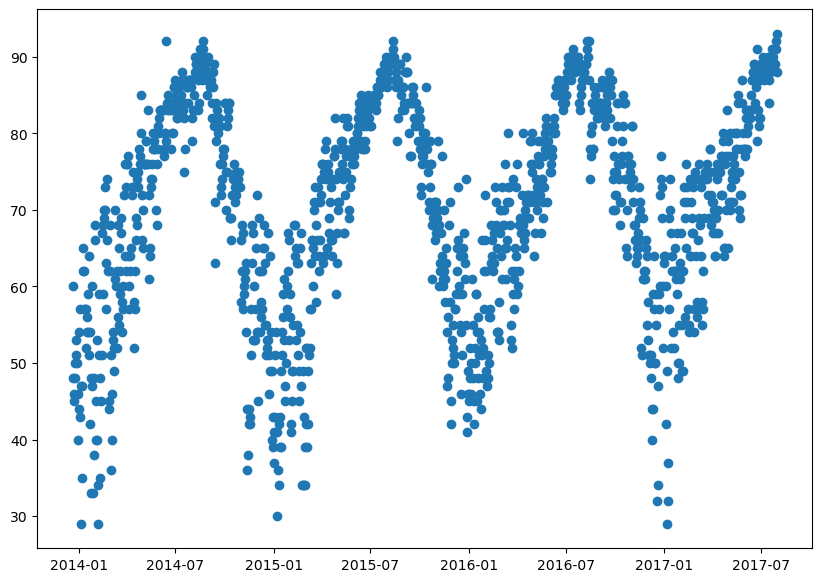

In [3]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.scatter(df.Date, df.data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAzYAAAJGCAYAAACJGhA0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAADC/ElEQVR4nOy9fXxV1Z3v/9knT5BIQgKSExBJRKwCFkFRkYoPVa9Cxfk5v1pq5XfbOojaubc6d1pLO1QYHyKtHZ17tT7VWgfGae+9M46tUiw+AcVQVETF+BgCpZIjkoQEgSQkZ//+iDuenLMf1tp77adzPu/XKy8lZ++11l7r+11rr5y9Px9N13UdhBBCCCGEEBJjEmE3gBBCCCGEEEK8wo0NIYQQQgghJPZwY0MIIYQQQgiJPdzYEEIIIYQQQmIPNzaEEEIIIYSQ2MONDSGEEEIIIST2cGNDCCGEEEIIiT3FYTcgm3Q6jb1792LUqFHQNC3s5hBCCCGEEEJCQtd1HDx4EOPHj0ciYf+dTOQ2Nnv37sXEiRPDbgYhhBBCCCEkIuzZswfHHXec7TGR29iMGjUKwGDjKysrQ24NIYQQQgghJCy6u7sxceLEoT2CHZHb2BiPn1VWVnJjQwghhBBCCBF6RYXiAYQQQgghhJDYw40NIYQQQgghJPZwY0MIIYQQQgiJPdzYEEIIIYQQQmIPNzaEEEIIIYSQ2MONDSGEEEIIIST2cGNDCCGEEEIIiT3c2BBCCCGEEEJiDzc2hBBCCCGEkNjDjQ0hhBBCCCEk9nBjQwghhBBCCIk93NgQQgghhBBCYg83NoQQQgghhJDYw40NIYQQQgghJPZwY0MIIYQQQgiJPdzYEEIIIYQQQmIPNzaEEEIIIYSQ2FMcdgMIIYQQQggh0WAgrWNrawf2HezBuFEjcGZDDYoSWtjNEoIbG0IIIYQQQgjW7WjDyt81o62rZ+h3dVUjcOvlU3Hp9LoQWyYGH0UjhBBCCCGkwFm3ow03rNk2bFMDAKmuHtywZhvW7WgLqWXicGNDCCGEEEJIATOQ1rHyd83QTT4zfrfyd80YSJsdER24sSGEEEIIIaSA2drakfNNTSY6gLauHmxt7QiuUS7gxoYQQgghhJACZt9B602Nm+PCghsbQgghhBBCCphxo0YoPS4sqIpGIkUUJQaj2CZC/IZxT8jneZDqOoKOQ32oOaYMyUrmA8k/zmyoQV3VCKS6ekzfs9EAJKsGYz/KcGNDIkMUJQaj2CZC/IZxT4h5HhgwH0i+UZTQsHBGHR7a2Gp5zK2XT438hp6PopFIEEWJwSi2iRC/YdwTYp0HBm3MB5JnrNvRhodtNjXXzWuIxUaeGxsSOlGUGIximwjxG8Y9IfZ5kA3zgeQDIjH/2zfaYhHr3NiQ0ImixGAU20SI3zDuCXHOAwPmA8kXRGI+LrHOjQ0JnShKDEaxTYT4DeOeEPn4Zj6QuJNPcz83NiR0oigxGMU2EeI3jHtC5OOb+UDiTj7N/dzYkNAxJAatdDY0DCrQBCkxGMU2EeI3jHtCPs8DJ5gPJF/Ip7mfGxsSOkUJDbdePhUAcpLK+HcYEoOLZh9v+yJdHGQPCZEhMxetYNyTODKQ1tHU0o6ntn+EppZ225egjTwQiXLmA4kCMvFtdu7W1g5cOq3W0r8GiE+s08eGRIJLp9fhgWtm5XgGJEPwCrDzLgCAhAYsOTcesoeEyHLp9DpcN68Bj2xqRebayLgnccWNL5NVHoieT0hQePEdc7rfAQBowHUxmvs1Xdcjpd3W3d2NqqoqdHV1obKyMuzmkIAJ2+3c8C6wSwqjNQ9cMys2iU6IKFY5wLgnccRtPDutBT+/eibmf3G8yqYSIo2X+VrkfieTB0Oc+2X2BnwUjUSKooSGOZPH4IrTJmDO5DGBbmpEvQvo50HyFfrYkHzCbTw7rQUagNueeYd5QELFy3wt49VkEJe5nxsbQj5D1LsAoH8ByU/oY0PyCbfxzDwgccBLnMrc7xjEJea5sSHkM9zos8dB050QUfLJy4AQt/HMPCBxwEucuo3dOMQ8NzaEfIYbffY4aLoTIko+eRkQ4jaemQckDniJU7exG4eY58aGkM9w0nHPJE6a7oSIkk9eBoS4jWfmAYkDXuJU1Kspk7jEPDc2pOAx9N+ffnMvFs0+3vF4DYPPri6aPRFPv7lXWjOekKiQ6X2w+YP9ePnD/fjicVWWL5TqsPcy8OKlQIgqBtI6Nn+wHz/7w7s4bvQI23ieO3kMVv7ubTy6aSf6+tMA7L3VjPPi4ulB8hcRD8DlC07B1taOYXOyoT572fSkVH1xiXlpueeDBw9i+fLlePLJJ7Fv3z7MnDkT//zP/4zZs2cDAHRdx8qVK/Hwww+js7MTZ511Fu6//35MmzZNqHzKPZMgMdNwLy8twuG+ActzKkqLUFKcwIHDR4d+R08DEjeE/AuyGF1egruuPNVSHtetlwIhqli3ow0/+I+3hs3PohheTcvmT7Utyy4PCAkaq7l34Yw6/PaNtmG/H11eAgBS+VFdXoLGkONdZm8gvbH52te+hh07duCBBx7A+PHjsWbNGtxzzz1obm7GhAkTsGrVKtxxxx341a9+hZNOOgm33347Nm7ciPfeew+jRo1S2nhCvCCr4W4HPT5InPAS+xpy45zeNyQKrNvRhuvXbPNcztJ5g5sbxjWJC9kegJ2H+vCdJ7zf39z05RPx3758Uujf1PjmY3PkyBH8+7//O37yk59g3rx5OPHEE7FixQo0NDTggQcegK7ruPfee/GjH/0IV155JaZPn47HH38chw8fxhNPPOHpoghRiRsNdzvo8UHigorYz4xzet+QKDCQ1rHit28rKeuRTa040jfAuCaxIdMD8MyGGtz2jJr7m9+8+hcFpQSL1Mamv78fAwMDGDFi+AtHI0eOxB//+Ee0trYilUrhkksuGfqsrKwM5513Hl5++WXTMnt7e9Hd3T3shxC/caPh7gS9DUgc8Br72XFOzw8SBba2diDV3aukrLQO3LnW/jFNxjWJKirvb+IY41Ibm1GjRmHOnDm47bbbsHfvXgwMDGDNmjX405/+hLa2NqRSKQBAbW3tsPNqa2uHPsumsbERVVVVQz8TJ050eSmEiOOnFnscdN5J4aIqPo1y6PlBooDq+NrVfjiUegnxiuqYjFuMS6uirV69GrquY8KECSgrK8P//J//E1dffTWKioqGjtG04c/i6bqe8zuDZcuWoaura+hnz549sk0iRBo/tdjjoPNOChdV8WmUQ88PEgVUx1f9mPJQ6iXEK6pjMm4xLr2xmTx5MjZs2IBPP/0Ue/bswdatW3H06FE0NDQgmRyUjsv+dmbfvn053+IYlJWVobKyctgPIX4j41kjigYgWVmGtK5T7pZEljMbapCs9LZQjSjW8Ogfd+LmX7+OvqMDSFbS84OEy2BclykpK6EBf3/JyRg1otjyGMY1CZu+/jQe3bQTP35qxzC5chVzvEGysix2MW6dtQ5UVFSgoqICnZ2dePbZZ/GTn/xkaHOzfv16zJw5EwDQ19eHDRs2YNWqVcoaTYhXDP33GxQo6ACfe9v09KfxjV/8aej3lLslUWN9cwodh/s8ldHTr+O5d/YBAJ7cvhdlxQno+DwPDIzNTlz8D0h8KUpoWLFwmhJVtIk1IzHjH/9g+TnjmoRN49pmPLKpFZl/O71j7TtYcm4DACDVrebxsYM9/VjfnIrVPYz0NzbPPvss1q1bh9bWVqxfvx4XXHABvvCFL+Bb3/oWNE3DTTfdhDvvvBNPPvkkduzYgW9+85soLy/H1Vdf7Uf7CXHNpdPrcNHUcUrKqrLQhk919eCGNduwbkebknoI8YIhh2v8ZU8VvZ+VZ+SBQbJqBCVxSezY3X7E9vPysiLGNQmNxrXNeGjj8E0NMCh68dDGVjy0sVVZXYf6BnB9zO5hpL+x6erqwrJly/CXv/wFNTU1+Ou//mvccccdKCkZXNC+//3v48iRI7jxxhuHDDr/8Ic/CHnYEBIkff1prG/ep6SsEcXmfyMw/oq98nfNuHhqkn/dI6ExkNZx61M7fK1jRHEC//o3Z2H/p70YN2rwMR3GPAkClXLPThzuHcCFJ5s/Xk+In/T1p/HIJnUbF1HidA8jvbG56qqrcNVVV1l+rmkaVqxYgRUrVnhpFyG+s7ppl7Ky7GRGM2VB50weo6xOQmTY2tqBjw96ewTNiVR3LxKahitOm+BrPYRko1Lu2Qkdg+vHteeeEEh9hBisbtqV801NEMTpHkb6UTRC8oXdHWJynqqIm2QiyS+Cij/GOQmDoOMu6PWDECDcuIvL3M6NDSlYJtWIyXmqIm6SiSS/CCr+GOckDIKOu6DXD0KAcOMuLnM7NzakYFk8p15JOYMyz5S7JdHmzIYa1I4q9bUOxjkJC5Vyz04kNHXrByEyLJ5TjzBec4nT3M6NDckrBtI6mlrahXxkSosTWDqvwXOdMydWYebxo2FWE2VBSRQYSOvY2tqB+af6q+J01RnH4afPvoNvPLIFS/7lFTyycadyBTZCzDDknoNgybkNKLUQjBFFZq0ixKC0ODEk6RwkyxecEpt7GNc+NoREjXU72rDyd81o6/r8OVAnH5mZx1ejvPTPONw3YFlueWmR7efb9nQBe7pMPxtdXoLGK0+lLCgJDbO8UE1ZcQJFCQ3//PyHw36/vnkf7vz9O7ju3AYsmz/Vt/oJMRhdXpIju68KDcB187zHspu1ihBRnO5Z3HDbM+8gkdBiEZ/8xobkBet2tOGGNdtybt7sfGSMc5wmAC8TRKdPCywhIljlhShfOTVp+YglAJxZX43/fuGJ6O1PW+aJ/pm3QuPaZldtIEQEI9b92tQAwLe/NEnJpkZ2rSLEwPCwsUP1pgaIV3xyY0Niz0Bax8rfNZs+Cmb8buXvmod91W93jkoMDxs+ZkCCRkWMr92RsjxfA/DnjsP4zSt7hMp6ZFMrH0sjvhDUfP7Y5t2eYtjNWkWIQVgeNkC84pMbGxJ7trZ22P5FOtNHRvQcVZjVTUgQqIhxu/VLx6BvzccHxbxD0rpa7yhCDIKaz73GsJu1ihCDsDxsDOISn9zYkNgjqq2eeVzQeuxx0X8n+UMUY47eH8QPgox1LzHsZq0ixCAq82fU45MbGxJ7RLXVM48LWo89LvrvJH+IYszR+4P4QZCx7iWG3axVhBhEZf6MenxyY0Niz5kNNairkvORcTpHFfSwIWFhxLgXEhps8ypZWYbaUWLeIfT+IH4R1HzuNYbdrFWEGITlYWMQl/jkxobEjmz9f2DQJwYwvwnTAcyfnsTLH+zHAy99iL/++WZc9s8bcNzokdAtzlEBPWxImBQlNNx6+VTX8a0Btn4JOoAff2UqVl4h5h2iwvuDFDYDaR2bP9iPu599F3c/+x42f7h/6EXmRbOP9108YMGpSfx+R5uw74zdWmWGDmDR7ImqmktihpO3UZAeNtnrRpzuZzRd1yMlb9Dd3Y2qqip0dXWhsrIy7OaQiGGn///6nzvxyKZW6ZfrNMCXBZG+BCQKNK5tls6LhDa4EZl5fDV+8B9vWUroGjEOwPI4TQN9bIhn1u1oM42x8tIilBYnXMs8V3/mNfb6nzttZXQrSotwKENG12l+t1qrFs6ow+ot9t5pXDsKD1FvIxG5Z00blNmXxZirZx5fHTmfJZm9ATc2JDYY+v/ZAevXxsQrP796JuZ/cXzYzSAFjFXOOCGaU8bf7R64ZhYunprElpZ2bPpwH976SzfKy4pwZv0Y/Ndz6vlNDfHEuh1tuH7NNqVlXjY9iWvOnoSzTxiD9c0p6fIzYz/7Zs9t3omUTfIPu3sb4PM4ENnUeOXBz+oaSOvY2tqBfQd7MG7U4ONnYX5Tw40NyTsG0jq+tOqFQCQ9VaABSFaNwB9vuTDyX9uS/CSonGGsEz8ZSOuYe9fzSHWLyYqLkBmzAHBO43P4+GCfp3KM2FeVd8yrwsApXow4eOF/nI9pt67zVe45yjEnszfgn9FILAjKp0AVcdF7J/kLvZpIPrC1tUPppgYYHrNbWztcbWqyyzFQlXfMq8JA1NvozrXNvnvY5EvMFYfdAEJEiLpuuhVxbTeJP/RqIvmAn3Glqmw/PdKYV/mN6Pjuag/OwybuMcdvbEgsiLpuuhVxbTeJP/RqIvmAn3E1btQIJeX76ZHGvMpvRMe3fkxwHjZxjzlubEgsCMqnQCXJyrLI672T/OW0iaMxakQwX8qPKEngmTf34tFNO9HXn8753E6m1w4n+VOS/5zZUCPslSRKph/HYPmlrsuqqShBqrtnKD5Pn1SNmgr35Zm1keQvot5GP5w/1XcPm3yJOT6KRmJBUULD9AmVgbwIrerWqac/jfXNKarakMBxI/HshZ6jaaz5058BAHesfQdLMuSdzWR673vxQ4wuL8FdV54qLZdLGdzCYn1zCgd7+5WVZ+bH8VczJ7hWm+o4dBQ3/2Y7AGB0eQkAuJaetmsjyU8Mv7Eb1mzLuf/IjIORpUVYcm6Db6po+RRz/MaGxILGtc1Y37zP1zqWzmtAMsupPTu/ZdL9wOGjuGHNNqzb0ea9cYQIYkiCet3ULJ3XgKXz5M3g0jrw0MZWNK5tHpLpNbvRO3D4KK63yA9D/jT7Dxmprh7mVAFhxI+d54sT2XN4smrEMBnldTva8LDNzaIG4OKp41BX5fx4zoHDRz1vaoDBDRKlnguHS6fX4YFrZuXcf2TH6rL5U7F0XoP0NzfZx48uLxnahFvVFWco90wiT19/Gl/4h9/76lVjyBxu+N4FeG1355B2++mTqnP+/aeWdiz911dxuC/3kRurcqMon0jyj77+NE5e/nsl39QkK8sAaEh1u/uWVAMwblQZPj5or2hVJymXy5wqDFTIPNdUlGDzLV/G9j0HTP04RKSZa0eV4uVlFwH4TKGt6whue+YddBxyp6QmQrKyDJt/8GXGd4Eh6h3T15/G4y+34p7nPrDd9I8eWYL7vzELs+trht3HGI+aRcmnxgmZvQEfRSORZ3XTLt8NOA2Zw9d2d2LO5DHDPsv+d3FxQmhTk1nu1taOnHIIUc3qpl3KHj/zKrGrA46bGiA3P0TlT5lT+Y0KmeeOQ0exfc8ByzgRkWb++GDfUKzNmTwGTS3tvm5qgMHcY3wXHkUJTWjMS4sTmD5htOM3mQeOHEVC01BanDAtN1/ji4+ikcizuyNaModupBDjLp9I4kGQuaISN3K5zKn8xg8pZrd1+CnnLFInIdlwnrSGGxsSeSbVREvm0I0UYtzlE0k8CDJXVOJGLpc5ld+oGl+7ctzEWlBxx/gmdnCetIYbGxJ5Fs+p913mWUbm8MyGms/eP1BbLiFeWTynXokkqIbB5/yTle4l1jVASKY3Oz9E5U+ZU/mNzDxrhVOcuIk1v60HGN9EBM6T1nBjQ4QJ0lMis67Xdnfib86VV2e66JRxwsfqABbNnih8/NfPnCR8bD7IJ5Lgscs3u8/OrPe2kBmRumLhNKxYOHXY72S4bl4DVl4xzfG47Pww5E/N6s0nSVJiT1FCw4qFzvFjx48uO9k2TjJjzQqZ+FSBblJnJvR2yh/cjKVxztNv7sWi2ccD4DyZDVXRiBBBekpY1TV9QiWea94nLCQwurwEs+urpc5xuiaztrktixAr7PINgJL8SGjAl08Zhx0fddvmtUzMG+Vm+9j83f9+I+dFV00Drss4Lhv62BCr2BElOxatMPN9cjrXzJ8JGIxrL3dVdv5OzIn8wc1Ymp1j5p2UjzEhszfgxoY4YnhKZAeK8XcAldrnTnVdO7cev9i8S6rM+xadhrbuHryyqxMVpUX4q9Mm4PU9B3Dv8x/kHGt3TVZtM7h0Wi1On1SDsaMGH+GJunwiiSZ2OaBqsp5zQjUe//bZKC1OCEmMZh6za/9h3Pvc+5ZtuW/RafjKaROErgewnz9E5U9J/mF42Khg6Tz7DYqb+HRaD66dW48LT65FWtfRtHM/Xt3Via27Oh3balVvkOsw8Rc3Y+m0Ltx80RTUj63I23mSGxuijCA9JUQ8BRIapOVsVfhk0FuDBIFIDqggoQHv3nYZSovlnkaWzQPmDXGDCg+bTKzi3W18uskDmethHuUvvP9wh8zegO/YEFtkPCX8rguQ39QAue1zc01B9gMpXERyQAVpfdDzRhbZPGDeEDeo8LDJxCre3canmzyQuR7mUf7C+w//4caG2BKkVrqfeutefTKoGU+CIMj4ceN5I5sHzBviBj/iwSze3canX3ng9XzmUfTh/Yf/cGNDbAlSK91PvXWvPhnUjCdBEGT8uPG8kc0D5g1xgx/xYBbvbuPTrzzwej7zKPrw/sN/uLEhtgSplS7iD5DQ5CU2VfhkUDOeBIHfHhkGCW3Q80YW2Txg3hA3qPCwycQq3t3Gp5s8kLke5lH+wvsP/+HGhtgSpKeEiKfAeScdK60Mdem0WmxpacfmD/fjqe0fYWtrB5YvsL4mw9Pm6Tf3DmnLO/VD9jl9/WlHffq+/jQe3bQTP35qBx7dtBOf9vQP+3dff1rySkncKUpoWL5gqmmMq9zsLDm3QVo4AHD28NABnDZxNP74/id4aEMLbljzGiaOHmGZszqAr51xnHQ7SH6jwsMmE6t4F8k3q/Vt0ezjbeN6xoRR+P8e/ROW/Msr+OUfW/GjBfZrW3a9yxecgi0t7bj72Xdxz/r38bUzJg77PLu+5QtOydsXx/MJkTl0/vQktrZ2DN03uDnHiXz2Q6IqGhEiKP18r74FotRVjcDCGXX47RttUprwojry2ept2X1l5puQjagHA8kf7OK/rDiBkaVFOb4ZMqiKKVlvGyfsvDtI4eLVK8aNV5KB1fqmOvbN6l04ow6/efUvOdddXlqE/rRu+kevitIi/OyqGcyhmCByDyDiKeZ0r2FGHP2QKPdMfMFvTwmVvgVOGK2+/+qZqK4os/XnyNaWl/H0MCvj9T934qGNrcJttfNgIPlDEPGf7THjhYG0jvte+BD3PPe+kvIA4EF6cZAsBtI6trS0o2nnfgAa5kweg45Dffhv//a60PlWMeXkQ/Pzq2di/hfHS53jlgWn1uKSaXUYN2oEOg/14cYn3M8DzKHoIxpHZr42xv3H+uYUfmni6efWfynqfkjc2JDYodq3QIRM7XcAyrXlzcoYN6oUn3zaJyVb7dZzhMSHgbSOcxqfw8cH+3ytJ9vTyQt+5KzK9pH8RGbeVeVDI1uvLMYcX5TQPOcUcyjauLlvUOVrE2c/HPrYkNih2rdAhEztdz+05c3K+Pig3KYGcO85QuLD1tYO3zc1gFqvAz9yll4MxAmZeVeVD41svbIYc7yKnGIORRs39w2qfG0KxQ+nOOwGEAKEq78uU7cbbXkVuPEcIfEhyFhSVZdfbaYXA7HDTXx49aFxW68MuzsOY+woNUpwzKHo4tXTSKYMFXEfR7ixIZEgTP11mbrdaMurwI3nCIkPQcaSqrr8ajO9GIgdbuLDqw+N23plmFRTHvncJN7x6mkkU4aKuI8j3NgQJcgKC/T1p/HY5p34w9sfo+tIL8qKi1FapKFvINhXvqrLi/HHDz+BrgM1FaXoPNRnKf2ZtNCWT3X1CL9MWuvyHRs3niMkPpzZUIPaUaWBvGOjyutgsM1l+PigusfRaipKcPqkamXlkfxDZt41m7dFy7DyEpGZ70Ux5viihIZkZZnnd2zoZxIeTvdCbuKoakQx3vzLgaF7laqRJagaWYKuI9YKmWZzqVPdVvkSN7ixIZ6RlQ5sXNsspQrmJ52H+3H/iy1Cx2b7GRja8jes2TbkZePEX80cVKSSuX63niMkPhQlNKy8YrrvqmiqPKcAYH1zCr0Dar2WOg4dxXk/fTHSsqMkXDLnXTvsfGhEylg4o87zfC/Kl08ZNzTHr1g4zdM8oDLHiRwi90Ju4qirpx+Nv39Xqi1mc6ld3ap9CcOEd0vEE4Z0YPYLaamuHtywZhvW7Wgb9vsobWpkuG5eg+mN1qXT6/DANbOQrBL76vbhja2YeXw1ls5rgMjccfHUcZR6JgCAY48pDbsJQxh578VTxwqruYMQg0un1+G6eQ22x4wuL7GVrnUq4+GNrTkxaMz3VZ95l6niueZ9Q3VdOr0OD14za8gfLZPq8hJcPHWcqUljRVkRpZ5DROZeyOq+QfV+QqbuZNWIyEo9y0K5Z+IaWenAvv40TvqH3ytvh+hfParLS/APC6bi9mea0Sl5Q+YkoWl8/ZzqOoLbnnkHHYfMHynK7JO+/jTOvPM5HOzpd10vyQ/8lJI1UCXlKdPWsqIELp1ei1PqKnGwt3/oMYqOw714/OXd6Dlq/o1PlGVHSfiIxGCysgybf/Bl2znbrWTu3LteQKpbXa5aSfpm+/ecfcKYobX08Zdb8cquTlSUFuHKWcfhnBPHMldCwkssZT62dvqkarzS2oHvPLENB2weM5NBtG7VvoSqkdkb8FE04hoZ6cA5k8f4JlksujPvPHwUBw73SW9qgOHXYUZRYnDhaWppt9zUGG3NlFO029SI1EvyAz+lZA2y89EtMm3tHUhj0ZmTcupramnHQxusv7lV1VaSn4jEYKq71zZ+ZNevzPNUbmqs6ipKaJg7ZSzmThmbc3xpcQJL5k3GknlKm0Fc4jaWjPuGTBIJTdmmRrbufIEbG+IaWenAKEgWe2mDyPX6IacYd+lF4kyc5J5lzzc7vlBkR4k/qIgfvyVz3cB4jycq5zPK6HuHGxviGlnpwChIFntpg8j1+iGnGHfpReJMnOSeZc83O75QZEeJP6iIH78lc93AeI8nKuczyuh7h+IBxDWGdKDVU5kahktP+iVZLPJYqNGWxXPqkayUM0HLvg47ZPpEtv9I/uIUC6IkNPgeT0ZbnbCrj7FPvKAiftyWoSpXReoi8UDlfCY6v4pSiLHFjQ1xjSEdCOTeTJlJB5YWJ7DUQcnGDackRzkeo3/WltLiBFYsnCZctqgE4kBaR1NLO55+cy8WzT5+2LnZ7Vi+4BQUJbRh/WdFPkgv5hvGWD+1/SM0tbRjIMuUKPvzvv607fEAhGKhYYzzt41Lzh3ML5F8dIPxwull05NCx2fXZ/TNb7d/hHMmj7F8P043OZfkH7K5ZHwuu/aY4bYMu/PcogNYNHuiotJI0KiIx+yy3MSW0z1HocBH0YgnDOnAbO32pIWPzczjq1Fe+mcc7htQ1oa32w46HpMtnTm6vMRUqlbTgEydQKvryMRMu96oz6yO2555B4mEhkun1w1Jjj6yqXWYaWdCG7xJzQfpxXzCyafA7POEhmFja+fxVGURlwDQ2m7/ftjo8hLMPL4aD1xTLZyPMohcm4HZNZqdb3ctJL9xk0uZn8uuPWa4LcPqPCtElDvvee4D/PqVPfRwiikq4jGzLLP7AjOqy0vQeOWpAIAf/MdbpuvHD/9zx9A9RyFAuWeiBBHpQEPn3SrgvjihEpfPmIBrzp6E7XsOINV1BB2H+jC6vBQHDn/+3z+27MeL734i1T6jJdfNa8DDG1st23DfotMwZtQIYQlEq2uyW8iM0h64ZhYAWJ5vHFMok1HUsRtrwDm2so/PHFun3BAhs9yLpyaVSnk6te9b50zCcdXlqDmmDMnK3Ppkr4/xn9+4zSWzuFAhW+u2jIG0jvte+BD3PPe+VH1WMO7jj4p4lJ0vH/zsXsLJ2DXOPkcyewNubEgguNV5z6avP42Tl//e8a8YVlj9hVmmDQZevEc0ALWVZQA0S+lQenlEB5GxtoutbDLHFoAyDxs/YsZr7rrNE8Z/fuI1l6IUF4OeNs8j1d2rrMwoXR8JHjfzZbKyDLoOfHzQPg7j7IsnszfgOzYkEGR03u1Y3bTL9aYGsL/xFG2DgRfvER2DPgt2fgiy7SH+ITLWMnGZObYqPWz8iBmvuev2+hj/+YnXXIpSXAx62qjb1ADRuj4SPG7my1R3r+OmBiicuOI7NiQQVOm8B+GFEzWPjULSn48qcfMWUFmu13wI2jeHRBtV4xmFuKCnDVGN3+NeCHHFjQ0JBFU670F44UTNY6OQ9OejSty8BVSW6zUfgvbNIdFG1XhGIS7oaUNU4/e4F0Jc8VE0EgiqdN4Xz6kX8q2xQqXPhxc/Aw2Dz8UmK+nlEQdExtoutrKR8TOSwY+Y8Zq7bn0ZGP/5iddcilJcnNlQI+2L5kSUro8Ej5v1IFlZhtpRznFYKHHFjQ0JBDufDhmd99LixJBXhx1mWvIa1Pp8ePEz0AGsWDgNKxZ67xPiP04+BXaxZUamT4tKXww/PAu8ejS48WVg/OcvMrmUTVTiItO37OtnTlJWbub1ATD18HHy/gEGRXYe3bQTP35qBx7dtBN9/WllbST+4mY9WLFwGlZe4ezPF3beBAUfRSOBYubTMfozHXZRGcJl8weT3sr7Zebx9j4eTp/LIOtnYFBRWjT0/yr6hPiPiE+BWWyZkTn+RtmGb4FXnUo/PAu8ejQY51v5LGTD+M9vrOJdy5jDR5r5nWnAdSH7e1n5lvX1p3PaW11egqvOOA6rt5h7t1WUFuFQxu+NfAJylRLrqkZg4Yw6/PaNNktvHwBoXNucszbesfYdLDm3YWjtJNFG9L6iOmueXGohk15RVoSffXVGwcynlHsmgeCky+5GX72vP43VTbuwu+MwJtWUY/GcepQWD34J6aQlr0JrPpO1b7bhxifsNeRlibPmfD4jGlvrm1P45eZdtmUZY6zCx8aqbJV4yRs33gyM//zEa7yHFRtOvmXf/fKJn32DomHO5DE4+4QxWN+csr3Wmy+agvqxFUP55HR8NpneN6//uRMPbWy1PHbpPG5u4oTTfcXPr56J+V8cD8Cfe6woQR8bEilUedhEFS9+NlbEvU8KHVF/i7qqEdjwvQtw3k9fVBo/RtlRiR/ZHGH85y8q5sswYtvNOiZ7jhfPp3GjSvHJp322UtkJDXj3tsuG/gBIootM7AD2Xmj5MJ/Sx4ZEClUeNlFFpQ+JQdz7pNAR9bdo6+rB6qZdyuPHKDsq8SObI4z//EXFfBlGbLhZx2TP8eL59PFB+00NMOgPtLppl3T5JHhkYiff77Fk4Ts2xHei5gujGnoZkGxkxs1Pb6aoxI/bdkSl/UQdcfWxcbOOyZ4TxDUF4QVHvOPHfVOhzKfc2BDfiZovjGroZUCykRk3P72ZohI/btsRlfYTdcTVx8bNOiZ7ThDXFIQXHPGOH/dNhTKfcmNDhJF9cdg4PtV1BDUVpeg41Gd5bF3VCJw2cTQe3bTTUgxgS0s7mnbuR+aLmVF4XtTQnU919Sh7+dt4JrYQNOfzEcPfQuQdm8Vz6vGLP7YqjR+j7DDjJ3O+GFsx6NmU6hb/i2F5SQK/eeXP+OOHn+CcyWMjk+9xxIvog8i5MuWrmC/DiG2ndpvN2bLnuO0bmXdsFs+plyiZOGEX+9mfnT6pGq/t7kSq6wj2f9qLA0eOQsu6n8m+b+o81CcUO7Kxmc9wY0OEMJO4zJaZdDrejmNHlWLaretMJSpnHl+dIxN734sfYnR5Ce6KgCSsoTt/w5ptQ+o4MmSfExWvBuKeooSGFQun4fo19kp5t14+FaXFCUyfUKn8PZsw48dKEleGw0fT+M/tewEA97/YEpl8jxuyc7fsubLlFyU0LJxRZ6ve5cTCGXWBx7ZIu7Nzzm5tMJvn3awlRjkrr5juqIq25NwGCgcoxC72AeR8ltBguvE07me+dsZxOXLedmTGjkyc5TtSqmj9/f1YsWIF/vVf/xWpVAp1dXX45je/iX/4h39AIjGYLLquY+XKlXj44YfR2dmJs846C/fffz+mTXM2DwKoihZF7CQugUGZycwFzA/pWjuiImMos5kzdOWB3MlP9KaDRJ91O9pMvVsy/Qca1zbb3oyUFSfQa2GwZ3bzk+1tEDROkrijTXybZIhKvscB2blb9lwA0uU7rQ8XTx2H9c37LD79vHy7tvuBU7vtpJRV/GHQi4+N4fFGqWd1OM1zfmMWb17+iBF1fJN7vuOOO3DPPffg8ccfx7Rp0/Dqq6/iW9/6Fm6//XZ897vfBQCsWrUKd9xxB371q1/hpJNOwu23346NGzfivffew6hRo5Q2nvhPUHKVXoiarO2WlnZ854ltOHDE+uYtWVmGzT/48rCvnlV56pBoYfcYZV9/Gicv/73t4yMagH/59pnoONyHsRVlgAbs/7R36NGGV1o7IvOIpsh8UVtZhp9ddRr2dfeg41AfRpeXouNQL/7XCx+iu6ffsY4o5XuU8SKzLzqOgGb5eKEb+WPA+q/aom33A5F2O8Wl20e5s48XKcfO4414J4z7nGys4i1f7ydk9gZSj6I1NTXhiiuuwIIFCwAA9fX1+Ld/+ze8+uqrAAa/rbn33nvxox/9CFdeeSUA4PHHH0dtbS2eeOIJLF26NKfM3t5e9PZ+/hx6d3e3TJOIz8jICM6ZPMYX6WMnMusPm6KEhkRCs93UAECqu3eozUUJLRJtJ/5QlNAwd8pYzJ0yNuez1U27HG/idADvf3wQ1557gunnVmWHgch8keruRULT8P/MOm7o900t7UKbGiBa+R5lZOdu2XOd3h8zK19kfXDKB6e2+4FIu53aIzvPWx0vUk5pccJyviDeCeM+JxureOP9hKSPzZe+9CU8//zzeP/99wEAb7zxBv74xz9i/vz5AIDW1lakUilccsklQ+eUlZXhvPPOw8svv2xaZmNjI6qqqoZ+Jk6c6PZaiA9EUa7Srv4okO/y1kQdotKrcZFodRv7srnA3HHGyzyksn/dyB+7KdtPOKeTTKIyzlFpR9SQ+sbmlltuQVdXF04++WQUFRVhYGAAd9xxB77+9a8DAFKpFACgtrZ22Hm1tbXYvXu3aZnLli3D3/3d3w39u7u7m5ubCBFFuUq7+qNAvstbE3WISq/GRaLVbezL5gJzxxkv85DK/nUjf+ymbD/hnE4yico4R6UdUUPqG5vf/OY3WLNmDZ544gls27YNjz/+OO6++248/vjjw47TtOHP8+m6nvM7g7KyMlRWVg77IdHBkJ+0ekJTw3DpTafj/SBsWdtsZPuMFC6L59TD6fHnOEm0uo19Qx5bBOaOGF7mIZFzk5WDEt4y5YusDyKvAwQ9h3JOJ5mEcZ+TCePNHqmNzfe+9z384Ac/wKJFi3Dqqadi8eLFuPnmm9HY2AgASCaTAD7/5sZg3759Od/ikHhgyE8CyEliQ/1j7uQxWPm7t/Hopp0YSOuWx/uFGxnDgbSOppZ2PLX9IzS1tGNA5MFuQYoSGpYvmGqpJw8UlvRinPASFwNpHZs/2I+7n30Xdz/7HjZ/uN/2/IG0jtd2d+K8k461LfeCLxyL13Z3oq8/7VvMiiDSN07zBTA89o0yn35zL75+5iShdnztjOPw9Jt7TdvgZ17HDdmxkD13xcJp+PFX7Oe55QtOwdbWDjy57S94dNNO/PaNvVg0+3jTcg3mT08KrR1BzqFe+lIE0bhlfEcDkXjwC6t4Y2x8jpQq2pgxY3D77bfjhhtuGPpdY2MjHnvsMbz//vvQdR3jx4/HzTffjO9///sAgL6+PowbNw6rVq0yFQ/Ihqpo0cRMRrC8tAhHjg5AN5GVNPOesaKuagSmT6jEc837chbJitIiXHP28fjNq3+xlcz1ei0qJRHtZJ/zRXoxH/Hq92EW71beK7I+T0CuWlSQsaRKrtbJ/2R0eQkO9w2gz0LeOpvMMvNZ6tQLfvnYALCc46vLS3CVjSeH4WlktT6UlxahtDhh+nmYY+pHjImWyfiOHmbS2hoG4/dQ30DO8XaKf1Y5IzLvF0Js+Cb3/M1vfhPPPfccHnroIUybNg2vv/46rrvuOnz729/GqlWrAAzKPRubnSlTpuDOO+/ESy+9RLnnPCBTRnB988d4+s02y2MvnjrOdKNicNOXT0TDsccMyRGub07Z+iHcf/VMVI0s9Sxr68XXwUv5Bj+/eibmf3G86/KJP3j1+3Ay4sz0XlHl86QqZp1w2zd2sqOq++C6eQ14eGOrb3kdd7xIwJqdu7455RjzKrj5oik4vqYcHYf6UHPM4KNvYcvXqpTTFc0tv9ctIo+bOey+RadhzKgRSHUdwf5Pe3HgyFFoWfcz2fF1+qRqvLa70zLeCiU2fNvYHDx4EMuXL8eTTz6Jffv2Yfz48fj617+OH//4xygtLQXwuUHnQw89NMygc/r06cobT8JBxHvDDlnvG1WeBX7XE9R1ELV49fuYe9fzjtK3hucAAKX+B37HlB8x7YcHhN1fQpl3ahGNeRXks2eRaG5t+N4FOO+nL3JdiRBu5jA/xqmQ7jlk9gZS79iMGjUK9957L3bv3o0jR46gpaUFt99++9CmBhgUDlixYgXa2trQ09ODDRs2CG9qSDwQ8d6wI9ODAJDzW/CC3/UEdR1ELV7GbWtrh9ANnnG+av8Dv2PKj5j2wwPCbj5i3qlFNOZVkM/jJppbq5t2cV2JGG7mMD/Gifcc5kjJPRMCqPPUkPW+8arZ7nc99DqIJ0H5ffg57n6V7UdM0+sq3gTdj/k6bqLXJbre5ms/RREvfe2XR1RQdcYBbmyINKo8NWS9b7xqtvtdD70O4klQfh9+jrtfZfsR0/S6ijdB92O+jpvodYmut/naT1HES1/75REVVJ1xQOpRNEIAMe8NwFr2UNb7RpVmu9/10Osgnnj1+xDxXzHON+pShd8x5UdM++EBkdDE5xviDRnPIa/k87iJ5tbiOfVcVyKGmznMj3HiPYc53NgQR7L10YsSGpac22B7zsVTx1l+pmPQq2BrawcG0rqj74sOYNHsiZbeFaLtBuCrF4Go1wEAKb8T4i+Z45aNnffKU9s/wtbWDvz4K9Mc61g0e+JQXcsXmNclSxCeSH74d9iVKYv22Y8xH/mR12Q4RQkNKxY6x7wKLp1WO7RORIHM3N/03id4ZONO/PipHXh0005hiXID0dwqLU74um6Rz+nrT+PRTc5jKjuHZY+TmedZpk/Zpvc+wUMbWnDdv7yKm/5tGx7e0IInX8/1p/HbXymuSKmiBQFV0aKFnT7663/uzNFwz/Sx+bv//QYOm2i5Z1JXNQILZ9RJ+R2I6LM7+S8E7WPj5P1g5XdCgsHKhybbK8lqbK18mDIxYt3MkymbsuIEihKabf5oGnDduQ1YNl/NRsmOoPw7DOxUzjKhj014OOUMkDvPGjj52GQThXF08p4y1j7ZfKSPTTQw86RxGlMrLy7A+p7FKm80DRC5Gy/U2PBN7jkIuLGJDiL66BeeXIvVTbuwu+MwJtWUY/Gcerzw7se+ehw46bOLtPviqUllXgRmuPV+eDBPNOfjhJMfwYMOXhJhE1TMqPTvMFj7ZhtufMLdXHHzRVPwtxdOyXHf9jOvyXAG0jq2tLRb+osZ45HqOjLkRfPn9sO497n3pfNIQ3ieHDK5v3Se/OZGNG4Z3/7QuLYZD21stfzcbkzNxgSA6TiJeJ6JYJYL+R4b3NgQz7jVRw/K48Cu/ijqusv6neTThBRlVHlJhElcY8aLn00++TMUEnEcc9k2JzTg3dsuQ2kxn/SPAyK+fCrGVOW9USHOf7752JDCwa0+elAeB3b1R1HXXdbvhASDKi+JMIlrzHjxsylUf4a4E8cxl21zWh/0eiPxQMSXT8WYqrw34vxnDzc2xBS3+uhhexxEVdc9Dj4fhYhqL4mwiGPMqGhzHK+7kInjmLupL+rzBfkc0bHyOqZ+xC3nP3O4sSGmuNVHD9vjIKq67nHw+ShEVHtJhEUcY0ZFm+N43YVMHMfcTX1Rny/I54iOldcx9SNuOf+ZQ4POAsXpRTNDHz3V1WP5wqSZPrrhcRDUOzZm9du12+o8vxHtl0LUnA8T0XhZPKcev/hjq20+hEWUY8bu5XKROcYK0TzO9xdqo052/58+qdr3MVeNbJwmtEGvNzc4xavV53396RwRn6Df8Ylrri2eU4871r7j+I5N9piazW2z62vw2u5O7DvYg7EVZYAG7P+0F+NGjcBpE0ejurwEnYJKgHaElQtxgRubAkREGtDQR7/BRsFj4Yy6nInL8DhQqYpmeNlk/hsw12fPbLfMeX4j2i+FqDkfJqLxUlqcwPQJlZF8zyaqMWMma3rfix8Okza36ns7RPO4ECRQo4ydNLqbPNIR3tzttBZmsuTcBlebCqd4tevP59/ZN+zG/I6177iSnnZLnHOttDiBJec22KqiZY+p1dxmJ9ksKmEvSlTn/SjAR9EKDEO2MnthSXX14IY127BuR9vQ7y6dXofr5lkbcT68sXXY8ZnnPXjNrCE9dzucjlk6rwHJLKf2ZNUIW9nPS6fX4YFrZkmfFzZL5zVEtm35jEi8NK5txvrmfZZlfPG4StRVqXssoKKsCEvnNdiWWV1eEll5cEPW1Myn5MDho7j+s7nG6PsqgbnCQCSPZeY5oh6r/m/r6rHNo6jitBYCgz4kbqSeAed4bVzbbNuf2TfMaR14aGMrGtc2S7dFlnzItWXzp2LpvAZk7xMSJmNqN7fZaQw7bWo0wT1KdXlJpO9jogDlngsIWSlkr9LJxle1m1s+wd4DPZhQPRJnN4xBIqFh/6e9GFtRhv/xf95AqttZatf4elfmK+4ofTUuIhkaV9nefMHuMQ8ROdC3V16K7XsOINV1BLc98w46DvW5bkuysgybf/BlABjyAdn/aS8OHDkKzcQvJErISpsDwDmNz+Pjg/bHjx5Zgvu/McvxuqMq+V4oeJV0tkqzMMdN5JpqR5Xi5WUXSbdNpGy3f+33W3o633LN6ZE+P+wsKsqK8OA3TsdZJ4zBK60d+M4T23DgiPXjasbaEIf+VInM3oCPohUQMlLIcyaPkT4+m6KEhrlTxmLulLGm5ze1tFtuajLLf213p2n5ThQlNFfn+YGIZKhdXxL/sYoXUTnQJ/60G9eeewKaWto9bWoAINXdOxQLcYsHN9LmTpsaADhw5CgSmua4oHudt4g3vEo6230W1riJXNPHB/tctU2kbLePMBkyxdeee4K7AhzIt1wrLU7Y9pUfdhaHegdQXJRAaXECiYRmu6kBhq8NxBxubAoIWSlkv6WToyrN7AeFdK35hqwcqKoxjGss+CltLnI8cy1c/O7XMMbNz5jy+3r8lJ4utFzz6zqCuucqFLixKSBkpZD9lk6OqjSzHxTSteYbsnKgqsYwrrHgp7S5yPHMtXDxu1/DGDc/Y8rv6/FTerrQcs2v6wjqnqtQoHhAAWHIVlo9yKFhuHSs7PF+tyfOFNK15huL59TnvFSaTaYcqNNYixDnWDCkzZ0wrlH2eJH6mWvh4SX+ExoiOW5+xpRIf9n1ix1epKdFKLRcE52rRAn6nqtQ4MamwFg0+3hLvw5guISgIXOZ+XkmOoDykgSuenAzlv37G/jJ79/F3c++h80f7kdffxpNLe14avtHaGppx0Bax0BaH/Y7oz6z8sOUZvYLmb43yO6zAZV6kQR9/Wk8srEF1/3Lq7j5169j0/uf5MTqa7s7ce2X7BWRDDlQQ4DgsulJ6HB3MwLEO+4NaXMnjGsUPX7R7Il4+s292PTeJ3hk4078+KkdeHTTTvT1p3PqL6R5xQrZucPtXGOc9+S2v+DRTTvx2zf2YtHs4wGIx7/22c+Sc83zLOxx8zOmnNZZALjgC8e68s9acGrS1/4KOtfcxKjTOaJlGnP7/FPVqZFlS5hz7lIDVdEKBDOd+Uwqyorws6/OMJUQbFzbjEc2tUq9wJit527IOmdKJBo69wBiq4EvglPfV5eXoPEzXw+n8/KpX8KmcW0zHt7YmnPDUFacwMjSopxYNfOLSGgY8oswG69sNSMndSNNA64L0H/CT8y8HgDreJcZj0wyxyC7/kLNH9lrd9tXdnPb6PISHO4byNl4AkBFaREO9Q3k1AVAKmaCxs+YEpk/sqkuL8EZ9dW2EtpBxHwQueamDrfeQNllOq3hIpgp/mV6enm91nxHZm/AjU0BYOjMOw20mQa/6LluMP7m8MA1s3Dx1GRkpJlVItp/2X4kVudl9lmhTnAqaFzbbGvIlo3R7/9r0Wn4+GBvjhyo0zhfO7ceF01NYv+nvfhv//a6Y135Mr5m7txmcs0q5hmz+StKku9BITt3uJ1rvI7Z5V9M4qKpyaFxWd+csi0vKp5NfsaUUfb65hR+uXmX0DkXTx3n6A0UxJziZ7+4iVGnc66b12D6h5TsMr3G+bVz61E5shT3Pve+VPsLce6ygxsbMoSMp0C25r0XPwJR4qZzL4No/6n2DyL29PWn8YV/+L30QmXV76LjteF7F+C8n74oHQ/5jqp5xm/PjjgQlFeZijHLHC/OeZ/jx7ob5/5zExtevYFk52wrNAC1lWUANEe/vjiOTZDI7A0KdwUoEGQ8BQzNezfnuiVT5z7fEO2/7D6Q8QYg8qxu2uXqr29W/S46XqubdrmKh3xH1TyTPX8VIrJzh9u5RsWYZY4X57zP8WPdjXP/uYkNr95AsnO2XTmp7l4hv744jk1U4cYmz5HVO8/UvA9SKz0fddndenRQy95fvPo6ZPe76DjI1lso46vyOv307IgDQXmVqRozWe+nQsgJP68xjv3nJjZUx2cQxHFsogo3NnmOrN55puZ9kFrp+ajL7tajg1r2/uLV1yG730XHQbbeQhlfldfpp2dHHAjKq0zVmMl6PxVCTvh5jXHsPzexoTo+gyCOYxNVuLHJcwxddBGyNe9V+HE4kc+67KJ9Ty37YFk8p95VTFv1u+h4LZ5T7yoe8h1V84zfnh1xICivMpl1xQoZ76dCygk/1t0495+b2PDqDZQ9Z7sdCw1AsrIMyUrGdpBwY5PnGLroIol57Zfq8druzmE+M8sXTPVFEQ3wV5c9Cv4von2vA5g5sQr3rH8fmz/cD8Da38c4/pzJNfjtG3vpbeOC0uIErptn70uTjVOsfu2MiZZ5ogOYPz2J13Z3YvkCsVwsJK8CER8PEQwvoUJG1gfDrW+GzLpiReZ4ZbbDikLICUMJ69JptY7rruH9c/HUcUJlx7X/ZGPUyUvM6Ldrv9RgO2cvX3AKihKapf+cE0a9KxZOw4+/Yn4fZUhAGx5dXM/VQFW0AsFOhz2hAV8+ZRx2fNQ97HMz7xlRZHxsVEtQRk0D3q7v7bTtgVx/HzMKXd/eLVa+KWbYeaWY+W5knpe5TtVVjcDCGXX47RttpuNayGNplbdm/kGZWI1NIROkj41V/BseK3beT9ll/d3/fgOHM/xtgPzydrJD1islc3zs5rKoeAB5RSRGRbyAjDl49ZY/58RaJuWlRSgtTgjf/9h5M9l5PQHB3BfFHco9E1OMv2Ts7TyM7X85AEBD/ZhyjKscgf/+b69L/VXif141A20He7C+eR90PY2TakehurwMicSgV8Xs+hq8trtzmAY7AN912aPq/2L0farrCDoO9eEvB47gMQefggevmYV0GrjxiW2O5eeT90mQ/O6NvY6+MgbZfbxuRxuuX+M8NtllAMD9V89EdUXZUDzUHDP4uEKhexVkezd0HurDd56w9pD4f2dNwJ1XfrHgv6kxQ9YHw41vhpPHx4PXzMKFJ9diddOuHO+n7HKccikqPjZ+IOqVctOXT0TDscfkjI/IOORD39nFqKiXWOehPqE11Q03XzQF9WMrhL2ZzAj7XiWqcGNDhHGjmR9V3fW4eCEMpHXMvet5pLp7bY9LVpZB14GPD9ofB0Tn2uKEbOxn9jEAoTF0KodjZU1c8rlQUTU+ovNhXZ6OtVu/M9HzCyFPZLzEzl31PD4+2OdLOzJj1IsfUSGMmSz0sSHCuNHMj6ruely8ELa2dgjdEKe6e4U2NUB0ri1OyMZ+Zh+LjqFTOcSauORzoaJqfERzKV/H2q3fmej5hZAnMl5ifm1qADmPKDsKYcz8pDjsBpBw8aKdHjXd9bh4IdCnIBq47StVfcyxsicu+VyoqBofmfHLx7F263cme34+9p2BX15ibpD1iBIpi8jBjU2B40U7PWq663HxQqBPQTRw21eq+phjZU9c8rlQUTU+MuOXj2Pt1u9M9vx87DsDv7zE3CDrESVSFpGDG5sY4OalTlEMvfdUV4/wC27G859WuusDaR1bWtrRtHM/gEExgbNPGOP7s6JO1+LU7iAYSOtIp3VUjShGV0+/7bG1o0rR16+j84izKksUri1unD6pGjUVpeg4JP5oQnV5CVLdPRhbXorq8hJ0ulAMBICaisFymlraC14wwIq45LPfgih+4bXtImvH6JElSOs6BtI6ihIa+vrTOUICZzbUIFlZJvSOTdjzmx/jbfSjyGNLNRUlOH1S9bC2pLqOoKaiFJ2H+izHIfM8vxDpG9X9J9sHo8tLMXpkMQ4csV973WLmESVzb2UQhbktzlA8IOIEIV1sqIkAudLDZtgpcFnJfxoSxn6rfFhdSxSURmTlPMtLi2zlKDOhKpocsmPhJ5T3tCZu+RyXsVTVdtG1w0q225B+nnl8deRV0fwc78a1zXhoY6vQsU6S8Xbn+RWbbqWYvbQpSnO4QXaMelHO5Ho+HKqi5QlBShfLTBJL55l7CkRFsjOKNxyicp5Arh6+CBdPHYdH/r/Z7hpXYMiMRRBwIbMnTvkch7FU3XYVN5hL5w1ubsz+KBYFHxY/xzuo+civ2BTpGwDKY87vPisrTmBkaZGQj41VjLrZ2IQ9t0UVbmzygDAkHI1HyL7zxDYcsHn8yUx2M2qSnVF6RERE9rGitAjfnFuPsxvG4O//zxvCamgGCQ1497bL6OfhgBcJTq9km9YO+wyU97QjTvkc5bH0q+2ia4cVxvxVlNBCeYzZDj/HO+j5SHVsivRNbWUZAA2pbjX9F1SfJSvL8OLfX4C5q16wfVy5urwEf/rhRTlrr2w7R48swf3fmBV6vEcVyj3nAWFIOBYlNCQSmuPCZCU5GSXJzqLPjEKvOG0C5kwOd6IQkX081DeAL514LIqLEtKbGmDQWXl10y6XLSwcvEhwesXuT0iU97QnTvkc5bH0q+2ia4cVxvxVlNAwd8pY/P1/ORl//1++gLknjg39Js/P8Q56PlIdmyJ9k+rutdzUuGlTUH2W6u7FE3/a7fgOZufho3htd2fO72XbeeDIUSQ0LfR4zwcoHhBRwpJwdFtvoUt22hHUWAYhZRl3oh57UW8fibe8rp9tz9f5K8p95pYoStZHMa9EY9KsTXGKh3yDG5uIEpaEo9t6C12y046gxjIIKcu4E/XYi3r7SLzldf1se77OX1HuM7dEUbI+inklGpNmbYpTPOQbfBQtohhSgVZfSmrwR/7Sbb2GZKcTUZDsDBqZPhXtx2wSGrB4Tr2XZhYETmPhJwkNgeczUU9Yc7MK/Gy7l9yK8vwV1T5zg+rYFOmbZGUZkpXq+i+IPjPatHhOveuxl2lnlOeMOMKNTUQpSmhYvmCqpX8DANx6+VRXLys2tbTjqe0foamlHQOfaW8OpHVs/mA/7ln/Hk6bOBo6zG/CdIt6ixIaViyc5li/mzbHnaKEhlsvz1WRA3LHUrQfs7n2S/UUDrAgM+a3tLTja2dMVK6mo1n8v/FvDYOytnbnFmJuZGI1N8ke43ebMvPZbKwBf8fSrg9UzO+LZk901S67fnEiyvOXn+Ptpc9kMcpfvuAUbG3tUJJDTu3XAaxYOA0rFnrrvyDm8GxuvXwqSosTrsfebt2XKYfIQ1W0iGInoelWDtBKNnXhjDr85tW/CMkaOvnRNK5txsMbW3MmnYqyIvzsqzMKVsLQyt/HTibS7HgrgvIJihsyUrSjy0sAYFifaxDzdjJyEoClNDGAyMrZhk0YPhhe2xSGDLVdnYB57FnN73YqfV79RczivLQ4gaMDadM64yBx6+d4263N2X41Vr8fXV6Cvv60pfeZXXler0HEv85t/3mVE7fqF6v4N2uTl7Y7reNxiP0oQLnnmOOk0f7zq2di/hfHKy1TFDvdeac6wjZYCwu3/bL2zTbc+IScBn6h9rEZMjF/80VT8LcXTgGAIVnhXfsP497n3rc8/6Yvn4iGY4/JkR82kyZe35xiblgQhg+GijZdOr0uUBlquzb59Q2km3510844+P8A/sqOW5Ut+vvOQ334zhPWc8yScxvwi025f3T004vHa76ouG+xum6Db50zCcdVl6PmmMFH5qzapLrt186tx0VTk6FK18cJbmxijB+a+ap1383aEGdvBz9x2y9uxywon6CoI9N/fsczc8OaMHwwVLQp6PEKw38p6LWmkPPAKyL9ntAGZbXN8NOLx4s3koqY9+u67YjiHBJ36GMTY/zQzFet+27Whjh7O/iJ235xO2aF2MdmyPSf3/HM3LAmDB8MFW0KerzC8F8Keq0p5Dzwiki/271K46cXj9uyVcW8X9dtRxTnkEKCG5uI4YeWu1/a6JnlRlGDPgoE4Qvkts58xquHgMp4Zm5YE4YPhqpyghyvMGMj6LWmEPPAK2H60viVL3HOryjOIYUENzYRww8td7+00TPLjaIGfRQIwhfIbZ35jFcPAZXxzNywJgwfDFXlBDleYcZG0GtNIeaBV8L0pfErX+KcX1GcQwoJbmwihh+a+ap1383aEGdvBz/x4gtUVyU/6RViH5vh1UNAZTwzN6wJwwdDRZuCHq8w/JeCXmsKOQ+8ItLvfvlo+ZUvqmI+DP+wKM4hhQQ3NhHDD818O08cN+gA5k9PYmtrx5AGvl++O3HHy3h+7Qx5PwmZPg7aEyRIZPwhzLw7VOSh0b9Pv7kXi2Yf76msfEWkn1X4YKhukx/jZZePIm0y+0wUqzLNPE8MT5yfrHsHN/36dfz02Xex+cP96OtPY2trBy6bnrT0yXGqr1DzIBOjf+9+9l3c/ex72Pzhfse52Sk+NHzuo6W67/1a+716/MhcN4Ch3Nv8wX5s/nC/47poN06yc4ibMSfWUBUtoqjUzHfyxJk+oRLPNe/LmZjKihMYWVo0TIM9W2HEzkPBa7vzica1zXhkU+uwvktog5PusvnDTbxkPWwAeS+UMDw4wkDGA0G1f0H2eWY+OfnY524QyY+o+diEUZdKHxtjzrA7T8YrJdsXxE6NymodKfQ8EPGDcTo/aO8lPzz3RMs36nDy55HNG6drEB0nUX8uL2NeKFDuOU9QoZnvpKXupPH+86tnorqiDOubU/jl5l05n2tw9lBw47uTT9iNgYbh/gHrdrTh+jXi3jWXTU/imrMn4ewTxgjHhqjnQL6QmUdjK8rwyq4O3Pv8BznHWV2/Kv8CI1duvmgK6sdW+O57Ehdk8iNI35ig6pPNR7s22XmebGlpR9PO/QA0zJk8ZticIeuJogp6eXyOyNwv4nflFLMqY9oPzz0zsudwaMD+T3uF/H7MyhD1FwNy81B2nOzapWrMCwFubAgAddr2G753Ac776Yv0JnCBjJ49AMy963mkunuFynbTt4Wur+/39Rd6/8pS6P0VxesPyjMn38dWhoG0LjT3R8mnLIqxK4Mbr7MN37sA837ygpJxiuOYhwl9bAgAddr2q5t20ZvAJTJ69ltbO4Q3Ndnn+tGefMTv6y/0/pWl0PsritcflGdOvo+tDKJzf5T6K4qxK4Mbr7PVTbuUjVMcxzwuFIfdAOIfqjTSd3cc9lxGoeq1B6Fn74fPRL6Ol9/XX+j9K0uh91cUrz/ovs7XsZUhCr50skQxdmVw0y6ZeyGn8uM45nGBG5s8RpVG+qSacs9lFKpeexB69n74TOTrePl9/YXev7IUen9F8fqD7ut8HVsZouBLJ0sUY1cGN+2SuRdyKj+OYx4XuLHJYwwt9VRXj+XLcYnPlGysXtxNVo3A4jn1+MUfW23LscIoo5D02rNfdExWjsDH3eZ9l90/ycoy6Xds3PhMWI1lvo1X9oubp00cjZqKUnQc6jM9Pvv6RV5IzXwp+6yGGqnxLnRk4tFsLABgS0s7Nrd8gr0HejCheiTOmTxWWEwjaDGCbNzmo0y7jWNTXUfQcagPNccMzklW54isG6qoqSjBaRNHo6mlPbQxiAJnNtQIzf0VpUX444efIK3rjjHuRmRCts1BrSV24gGnT6rGa7s7pa9FNs6TlWVYPKcej2zaKfRezOmTqtHU0j6Ud6PLS3Hg8Of5d/qkaqExp9+NPBQPyHMM1RJg+ObFSPvr5jXg4Y2tlp9nKoFYlaOb/L9ZGYWAlczvgcNHhfpHRhUtWzFKpo12MZEv42U2FnZiGcDwPhWRTjWT6SwvLcLhvgHmgyAi8QjkSrLaSQ+LSKVGRfJcNh9l2u1WiteqTX5A6edBZBUx7WLcjSy4WysJv9cSJ7lnL/EjE+cVpUX42VUzAMBxnJbOa8iRn87GkKl+6LP7LyuoijYIVdHIMFRp2wc1WcYVJ5lfY4NjYHczIuJjs3RergeOTFvzebycZEitMPrUSYL3unkNjguS6HgT57nFzVgC1jcFUZM8l5mDRdstkgN2fxyR8YBSSSH/AcCNh1l2jDutQ2Z46XM/1xI387jstcjG+YOf/aHFbJyqy0tw1RnH4eGN1hYa2W29bl6Drc9UoeWAFdzYkBxUadv7/fV2XBGRvqytLMPPrjotR3/fjL7+NM5ufN7ykSnAuwxkvo6XF7naOkF5cxH/pqTEeBPzeATgSXrYLEeiKlMrMkfLSMeL9JvTtRqPWn7niW04cET8ZtsrUZcK9hOjzze3fILHX96FQ31p2+MzY9zL3Oelz/1YS4K8FqPPb/zX19DV0297bF1GjmV7Q82ur5GyxsiUkX6ltcPSZ4rI7Q34jk2BUJQYTBa3n4scJ1pGPiIifZnq7kVC03DFaRMcy3ttd6ftpgb4XAbSbZ/n63h5kasVlTcX+WuQzHgT83hsamn39I2BWY7IyNQGmR9O+SgrryvSb07XWpTQkEhogW5qRNqVzxQlNMydMhaJhIafv7TT8fjMfvIy93npcz/WkiCvxYhzp00NssqdO2Us5k4ZO/SZ7HxltPO13Z05ZRH3cGNDiAJUS1/GXUozTLz2iQp5cwOOjzdU9F92GXHNLT/bbXdOmP0QtTEIEjdywH7kS1gEfS0qjvXbJoCIwY0NIQpQLX0ZdynNMPHaJyrkzQ04Pt5Q0X/ZZcQ1t/xst905YfZD1MYgSNzIAfuRL2ER9LWoONZvmwAiRiLsBhCSDxjSkVZPxGqQk21UXV4h4dR3Vhh9unhOveP5ImVzfLzjdiwNzMYgrrkl027jWCdErlW0LJVEdQyCxJCAdiKzn7zkS9T6POhrcdPfZmXI5ErU+jxf4MYmogykdWz+YD/ufvZd3P3se9j84X4MWOjUDqR1NLW046ntH6Gppd3yOJVtk60v6DYGTVFCG1Jwyp6IjX/fevnUnJcBrfrFbXnEvu+cuPXyqSgtTtj2vaFkI1JW9svf+ZwDfpA5lm5YvuCUoZeqjb7f2tqB5Qvil1tOca0DmDmxCvesfx8vf7gfXztjolC5Ttdq1KuqN5zKifIY+IkRo09u+wse3bQTv31jL75+5iTH85YvOAVbWzuEY9sOv/tcZg50O4+7jZ+ihIYVC6c5Hrdo9kQ8/eZey/Yvmn28cJ3A8PHjuqAGKVW0+vp67N69O+f3N954I+6//37ouo6VK1fi4YcfRmdnJ8466yzcf//9mDbNOVgMqIpmLfloplsftGyvm/ryXVo4E68eE9nHFlLfqaZxbTMe2dRq61tjICtvfun0OjSubTaV9awoK8LPvjoj1DzNN2TGMhPDKyLbU8Lu91EfE7NYElHpy0bW70NEhtjJW+hrZxyX0+f0sbGXHLbqU0NaWDa2X/9zZ04uJTRgybnu7QNEcDsH+uljY1WfVaxrnxmam9UlKxsd5zkoDHyTe/7kk08wMPB5cu3YsQMXX3wxXnzxRZx//vlYtWoV7rjjDvzqV7/CSSedhNtvvx0bN27Ee++9h1GjRilvfD4iYtL1YJZpZlBeDG7qi5pfRBCISF/K9Eu+yjL7iZP/wbfOmYTjqssdXdit+t6p/AcF/ETyOQdU4taTyA6j7++/eiaqK8pil1tGXK5vTuGXm3cJn/f/zpqAuVOOtY35bJz6P7vMZ3ekcOMTuWuYVZ+7dY7PF0Tj+7tfPvGzv+YPKpB1HT6K7zxhPa+Yxfb65lQoc5HXOTBzHh5bUQZoGJLR9yN+1r7ZZhrD2WQbnYvOUTdfNAVTxo2yHT+uC8MJzMfmpptuwtNPP40PPvgAADB+/HjcdNNNuOWWWwAAvb29qK2txapVq7B06VLljc83BtI65t71PFLdvbbHiXhtqPYBcOP9EFW/iLBhv/iL3/2r0k+EY22PFy8LJ+Le96LrhYGb65XNJc5tcojGt4p+Dmts4hYTbuac7G+N7DA87QANqe549EkUkNkbuH7Hpq+vD2vWrMG3v/1taJqG1tZWpFIpXHLJJUPHlJWV4bzzzsPLL79sWU5vby+6u7uH/RQqW1s7hBYpEa+NbE8DFW2Trc/NOYUA+8Vf/O5fmfI51t7w4mXhRNz7XnS9MHBzvbLxy3iXQzS+VfRzWGMTt5hwM+fIPCJreNpZbWqMY6LUJ3HD9cbmP//zP3HgwAF885vfBACkUikAQG1t7bDjamtrhz4zo7GxEVVVVUM/EyeKvfCYj8homYt6bajSR3fjoRBXvwi/Yb/4i9/9K1M+x9obQfRLXPs+CM8M2fhlvMsh2w9e+jmssYlbTESlHUC02hInXG9sHn30UVx22WUYP378sN9r2vCvzXRdz/ldJsuWLUNXV9fQz549e9w2KfbIaJmLem2o0kd346EQV78Iv2G/+Ivf/StTPsfaG0H0S1z7PgjPDNn4ZbzLIdsPXvo5rLGJW0xEpR1AtNoSJ1xtbHbv3o3nnnsOf/M3fzP0u2QyCQA5387s27cv51ucTMrKylBZWTnsp1CR0VF38tpQrY/uxvshrn4RfsN+8Re/+9eNnwjH2h1efWzsiHvfi64XBm69PWTil/Euh1u/oTitx3GLCTdzTkITl6TWACQrB0Vr4tInccPVxuaxxx7DuHHjsGDBgqHfNTQ0IJlMYv369UO/6+vrw4YNG3DOOed4b2kBIKqjLuK1AXjTR8/WmzfqtasvWzeeXizmiPhRjBtVir//39ux6f1PIulLFGVUxZ0KjyHmgDe8eBLZkQ99L7peAPLXa8T+02/uHfLlsJqrLp1Wi62tHRhI60LxTt+Oz5HxCMocOzfzipMnlI5BjxYvmM2ZdvWqmI/dfGb3O6eYz26/hkGpbNHjAWDFwmlYsdD+HiDOc1PYSKuipdNpNDQ04Otf/zruuuuuYZ+tWrUKjY2NeOyxxzBlyhTceeedeOmllyj3LIkKfwwv+uh2evMA6GOjCFHd+4rSIvzsqhmR8SWKC16uTbXHkJkPSxDeEfmCW+8WO6+PfIhxQMxjRtazJruvR5eXAIBwHX6sS/mM3Vpg1z+yc5zqWBFtCwDTeqvLS9CY5c3npmyZz8xiWfR32TjFvJPHjoxnYaHjq9zzH/7wB/yX//Jf8N577+Gkk04a9plh0PnQQw8NM+icPn26L43PR2T8MQyyvTY6D/W51kcX0Zu/eGpS2leFXizmGP3yyKYWvPDuJ7bHmo29FwrBX8VN3Kn2GLLLaQ350c9B4Na75UGXc1acGEjr2NLSjqad+wFoOKuhBomENuT14dWzRmQTaRxnxLPKdakQMPor1XUEHYf6HD22ss9zim1Rvxw34+ElbpzWNTdli8arHSJl/PzqmZj/xc/fM88eCyePnUJYg1URmI+NHxTyxkaF3ruXMuKmN58v9PWn8YV/+L3jJFoXsi9RIaC6X9jPapH1mGD/iqPCM8iqv5kH4eJn3niJG6d6/PSx8orXmGVOyBGIjw1Rjwq9dy9lxE1vPl9Y3bRL6K9LYfsSFQKq+4X9rBZZjwn2rzgqPIOs+pt5EC5+5o2XuHGqx08fK68E6YdG5ODGJkKo0Hv3Ukbc9ObzBVFPIiBcX6JCQHW/sJ/VEoR3S6Giso+yy2IehIufeaNizKzKiEM8BOGHRuTgxiZCqNB791JG3PTm8wVRTyIgXF+iQkB1v7Cf1RKEd0uhorKPsstiHoSLn3mjYsysyohDPAThh0bkKA67AYWI1ct+hn56qqvH8kXj2soypHUdT23/yPRltNMnVaOmohQdh/pM6zae2zTTR3eqH/CmrU4BAXMWz6nH7c+8I/SOTXbfi/ap2UuNTmNdU1GCVHcPmlraAxur7Jeg50weg7NPGOO5btF+EslBq/wxQ3V5hY7IHJVNsrLMtH/jMh+ZtROAZdvtcsjumt30bTZW8cw88IbbWDViYXPLJzimrAif9g4I1SczHl7ixqkeFTHpF15jljnhH9zYBIyTPOPCGXV4aGOr6bk6gJ7+NL7xiz+ZnmuUbbepAaz10Q29+RvWbLNs/8IZda4W/3yWFfZKaXEC181rsBx3g+xxE+1TO+nVhze2Wqq/dBw6ipt/s92yXNWYSV/e9+KHnqUvZWIvMwey+8WN94nq8gqdooRmO0ea0dOfxvrmlFBORG0+EpVetpPVNXLoaw6y12761gyzeGYeuMdtrIpIO5shOx5OY6ub/L9oPV7K9nMjpCJmmRP+QVW0AHGS9rtuXoOpf40dMueKLtyNa5stFzc38rSUNBRD1r9IpE9FYi77ZscMv8dq3Y42XG+zoQbcyV27jT3VN75xuZGOOqKStdlkzltxmY9krtXtjVzmNQNwzEE7RG+2mQfieJm/RMfSyWtFpq0q/e9UlP36nzuFNuqjy0vQ15/G4T6xb7RUxixzQgzKPUcQEdnC7AlGBqdzaypKsGXZRSgttn+tinK34dLXn8bjL7filV2dqCgtwpWzjsM5J451JZ264XsX4Lyfvih03Gu7O5HqOoLbnnnH8TFG1WM1kNYx967nkerutT1OVu7aa+ypflQpLo8+RRUVsrKiORH2fBSkzK3xiLOuAx8ftM/BTKpGFONvL5yCsaPE/FYMmAdiuJ2/ROfT0SNLcP83ZmF2fY2t14psm+0ekfQy7rJlA3DMocw+mPeTF5Hqtj62pqIEy78yTSrWVVwbGURmb8BH0QJCRLbQ7aZG5NyOQ0fx2u5OzJk8xvY4GQlCp7L8KC/fKS1OYMm8yVgyz/oY0T5d3bRL6DgjLppa2i03NZnHqx6rra0djoswXNTtNfaKEprS61RdXqGhQlZWNCfCno+ClLnVAaH8y6arpx/TJ1RJ9xPzQAy385fofHrgyFEkNA2lxQll42E3tl7HXbbsppZ2xxwy+uC13Z22mxpg8B4qWTnCl9hlTqiFG5uAiIJkn0rpRsrdhodoX4nKSBvlhTVWMuX5cSxjLx6oGCfZnAiLsOsXJS7tjCNu5y+/5tO44cf8n8/9lU9wYxMQUZDsUyndSLnb8BDtK1EZaaO8sMZKpjw/jmXsxQMV4ySbE2ERdv2ixKWdccTt/OXXfBo3/Jj/87m/8gn62ASEIe1n99RkQoPt53bYnatBXKbZqZ0yZflRHhHv08Vz6qX6PqyxOrOhBsnKMsfjZOtm7OUXInOoFW5zIiy8XKssGgYlsWtHOedgJlHop3zG7fzl13waN2T6j2tFfsGNTUAY0n5A7gZE++xnybkNpudqFv9vdq5ZYuoAFs2eqKSdgDu5W1XlEfs+BQbH+9bLp6K0OCF0nNH3IuXOn57E1tYODHh5IQyDL0s2tbTjqe0fYWtrB378lWmO5yxfcAq2tnbgqe0foaml3bENXmMvs41m9dl93tefxqObduLHT+3Ao5t2oq8/7Xh9xB6n+LRDx2D82OWEzHzkFBte8XKtMhhlr1g4DSuvcM7BTJYvOMVSdMOsb/zus3zD7fxVlNCwYqHzWIreE6hGND76+tPC8TKQ1rH5g/24+9l3cfez72Hzh/sBQLj/RNa+r51xHH67/SM8umknnnydMRxlqIoWME6yhWa689XlJWi88lQA9pKJZmVnokpekXK30cDKpyDb90X0uMxys8dKlSSoVfmGr85vXv2Lafxf5eDB4aY+u3OdzrH7/PU/d+KRTa3D+iuhDf7xYdn8qfadQxwx63sRuWPR8fMjntziNKcbOKliiuaQjPeJrGeW2/wtdPz0sQl6DGTiQ3TNcVrfAHGpadF8cyqHqIdyzxHHTNpvfXPK1rPA8PBwkgUcSOu474UPcc9z7+eUIevTQLnbaKPKy8YsHoyxWt+cwi8378qp263nh1Nb7r96JqpGlg5zTe86fBTfecKb74hM7Ln1mxK5uV46j5sbFTjFpxnZ8eJmPgrDA8duTnfisulJXHP2JJx9whgUJTSha177ZhtufMLZA0V0nhE9n1jjdu0cSOvY0tKONX/ahd/v+Djn8yDHwK0HlYFZW0X9zy6emhTuP9H4z2wXY9h/uLGJGSq9XugbUxio9rIxi4coeBoFHc9B+E29e9tljn5SxBk3Xi9e4iWsudWtp42b9sjWJTrPqGwjkSMK9wSqfJky2wpAuf9Z0HMKEUdmb8DVNQLI6NUHWRaJLqq9bMziQXUsuSkv6HgOwm9qddMu9wWQIdx4vXiJl7DmVreeNm7aI1uX6Dyjso1EjijcE6jyZcpsq6z/mQhBzynEHyj3HAFU6q3Tu6Mw8MvLxk0dfh4XdDwHkReiY0Ls8TJWbs6Ng8+T1/Pd1uU1prke+UcU7gnCzokg+oAxHB24sYkAKvXW6d1RGPjlZeOmDj+PCzqeg8gL0TEh9ngZKzfnxsHnyev5buvyGtNcj/wjCvcEYedEEH3AGI4O3NiEQPaLgKdPqkZd1QikunosX6yrqShBqrsHTS3tti++GXrsVmUZz4M66bFbvaxIAQD/EenjQa+CEUh12z83vXhOPX7xx1ZX8aAqlkTLA3K9Aty2oa8/jdVNu7C74zAm1ZRj8Zx6FCW0oX4dW1EGaMD+T3uH9bFIG7XPVALcPJGW0IDFc+pdnEmyERmrbGRjNjMXx1aUIVk5Ah93q8kHs/KtYtIu160w2nP6pGo0tbQLzdmyfSo6zzidT38Q/zh9UjVqKkrRcajP8piaihKcPqnat/XdTa6akR0vycoyx8fRRO+d3LaTMRw9uLEJGDu5w4c3tloqK3UcOoqbf7N96HgriUFDj/2GNdtyyhL1aaBkZ3iISnuub06hp3/AtIzMcTZ8O9zEg4pYsirPioUz6oaV56YNjWubc+SWb3/mHZSXFuFQn3mfZfaxVX0GVnIrIqpoS85toHCAIooSGhbOqMNDG1uFjpeNWbNcHF1eAh25Y+0mH0Tl+QFY5roVRgsWzqjLeanf7fphhdM849RG+pj5h6h8d8ehozjzzucAYNixqtZ3N3GVjVm8rFg4zVEVTfTeyUs7GcPRgqpoASIiI5u9cTBDRKLRi/Y9JTvDwat8s4HheyTiLxGGb0fj2mbLm1Er6UzRNtiVbYdZH4v6eWS3hz42weCUBxVZG1lZHy+rXNQxuMHxcgMoMs+K3FjZ+dMYfyxzI00t6ueRLV/OP4pFBxEpZCdUr+9B+tiYIXo9ovHPGA4Oyj1HEBl53td2dyLVdQS3PfOO5dfHIhKDsl8rBykrSoajSr4ZGPx6fvMPvmwq3+z2MQNVjyh4kR51akNffxonL/+9a9WybCnRcxqfx8cHnR9zWP6VaUhWDm+P2aNw/KZGHSJzVbKyDD+76rScR7u8lq0BqHVZtmjbRTFyHUDO481uZd4N+vrTOLvxedtHmMykdPkYc/gMpHUhKWQR/JDUF4mP0ydV47XdnULxYvj1NO3cj7QO/PqVPZ7unbLbaTwmuq+7Bx2H+lBzTFnOnE/8RWZvwEfRAkJUcvG13Z2YM3kMmlrabReUTInBOZPHmB5TlNAsP3PTRi9tIfaokm8GgFR3r+lYyMaDqnMzkZEelW3/6qZdnqSYs2U7nTY1wOBjDsnKETntKi1O4NpzT3DfGGKLyFyV6u5FQtNwxWkTlJateyhbpHwZMnM9MwabWtpd55nBa7s7bdcgWJRhlaeq5hDijKgUsgiq13eZ+BCtryihYe6UsZg7ZSyaWtrx85daLI8VvR7Ga3zhxiYgZOUGw5BoDFJWlAwnCPnmKOBnXKuSUfZLSpSow8848nvuDUL6VsU1REEmmLjDjzGJyzgzbgk3NgEhKzcYhkRjkLKiZDhByDdHAT/jWpWMsl9SokQdfsaR33NvENK3Kq4hCjLBxB1+jElcxplxS/jQd0AYMoJWT2NqGC51K3t8EG20wo+2FBqi4714Tn3gcaESP+N68Zx6eHncObPuQYndMsdzotzX+YyfceT33Ot2npVph4prCGMNImoQnb9EiNs4M24JNzYKGEjraGppx1PbP0JTSzsGTB70N2QEAeQknJmMoezxsu0xO/7pN/di0ezjTeu0Q89oi2zdZBDR8TZkVZ2Oc3qh0W6cBtI6Nn+wH3c/+y7ufvY9bP5wv7JxFL1OAMPa19efdoyr0uIElpzb4KpdmXUPpHX8anMrvpB0Fi+hzGc4uJ0fZefqbAylskWzJ+LpN/e6muPs2m52HWbHObWjKKFh+YKpln47gPOc7WUNIsFgN3YrFk5TVo+f4yxzz+DHvZYKstfMTe9/gs0f7ud9UEhQFc0jslK4cTh+dHkJgFw9+4Uz6vCbV/+SI6s4urwEd115KgAolQUuRETHzy/5ZgCm0pnGGKsaR6c2ZH8mKv0JDEo+W8nc2hmDWkk1m2EmqU2CRyYPZI81y4OK0iKUFCeUeH3I+NiIztFGO+wkcDNjV6RPzHyhKF8ePiJjJyOFXF5ahCNHB4b5dPk9zn7lr5vjvVyDUx/zPsg7lHsOCFHfkWzcyDCLHC/bHievhpsvmoL6sRVDda5vTtkebwZ9buQRHW838qlOY+7EgwrH0az9VjGWjV1cOXmEXDu3HheeXJvj8v6Tde/YeuDMmliFc048FnMmj8HZJ4zhX6ojgkgeyMyNQXp5mUnKmklIZx63a/9h3Pvc+7Z+aE5eTg9eMwsAHPvE6hjjOM7r4SATz2vfbMONT9j72Xzli3V45s02V55HblGRk6rvtdxcg4hXEO+DvMONTQB48eOIQntUH28HfW6igQr/DDPfClXIts8srtzmpYgHTkID3r3tMvrRxAyZmAAQaS8vkRwR+SPF4PsXGlLd9l49TsdwXg8e2XgW8bPJ/kbcqjxV46wyJ8OKQ1mvIOaLN2T2BlyhXSLjxxHF9qg+3o6g+4KYo8I/w89xlG2fWVy5zUsRD5y0PngciRcyMaHCy8tPRNon8pfKVHev5YbFKEPkGM7rwSMbzyI33nZznx/jrDInw4pDWa8g5ktwUO7ZJVHTSvfbJ0fFdVA3PlxU9b9f46jCF8RtXop64KjyyiHBEeRc7fccF8U5NIptymfCuvcIwzNPps6g4zAqPlYkF25sXBI1rXS/fXJUXAd148NFVf/7NY4qfEHc5qWoB44qrxwSHEHO1X7PcVGcQ6PYpnwmrHuPMDzzZOoMOg6j4mNFcuGjaC6Jmla63z45XrwXqBsfDVT4Z/g5jrLtM4srt3kp4oGT0AaPI/FCJiai7uUl0j6Rticry5CstO8TkWM4rwePbDyL+NkkNOu48WOcVeZkWHEo6xXEfAkObmxcIqKVvnzBKdja2hGIlrlse7a0tONrZ0wU8jkQLd/uM/odhI/oGNrhZ0zb+YdkYxVXTh4hOoAfXXZyzjUUJTTMP9VerWbBqUn8fkcbfQlihKGKdNn0JHQ4z0+iHjNmBOH1IeI1duHJxzqWt2LhNKxYaJ8ndsdY5R99zPxHZI7LjGcRPxvD/8upPNHxFfFCWzT7eKH7D5HrnTmxCvesf3+oHrN2uo3Nvv40Ht20Ez9+agce3bQTff1pAHJeQbwPChaqonnESit94Yw6/PaNtsA9XWTaY4WdR4edNryZBwj9DqKHGx+b6vISXHXGcb7HtJUngKZhmL+CU712HiHZCkBmniDD6sagx8OhvgHh+kn4mMWAqB+Sk8dMJmF4fZjFbPa1mamjZc/tVvmW6VsVhLcWkUdk7AysvL0qyorws6/OsPU+kvWpc1NOJjI5aRbj5aVFKM3ymnLyfbJCxMPJqm9FromIQ7nngMnWSu881IfvPCGvuR50e+yw8yuR9R+h30H0sNP3H0jr2NLSjqad+wFomDN5DLoOH/U9pp38Q7J9lZz+8iXi3+DEnIYabGntCC2XiTtEvIwumpq0jaOBtI77XvgQ9zz3vm1dYXl9GF5jXUeO4pebd1mWMX96LU44dpSp/5KoP4iTH4hbnxHiHtE+d8qFBx2Os5MPN6tLxNfFipsvmoK/vXCKbU5ube3A+uaUbcyL4BSbjWubbf2gls5rwMzjqz3PM0QMbmxCJG7+NmbItjFq10zUEsT4qq5DhWcPELy/A/GOqliSiaGwvD68eM0E1U/ME/WI9vmG712A8376oufj7MgsY95PXpCSQDYrRyTeZPxj3NQp4ms2mH8j6PMUEPSxCZGoaa678WWQbWPUrpmoJYjxVV2HCs8eIHh/B+IdVbEkE0NheX148ZoJqp+YJ+oR7fPVTbuUHGdHZhleNhsy8aZiU2NXp4iv2WD+Me6jCDc2iomrv42Xc6N2zUQtQYxvnGONcR0tVMWIm3ENw+vDbVlB9xPzRB2ifRmkP5cqjy8/8lK2TpV+ZYz74OHGRjFx9bfxcm7UrpmoJYjxjXOsMa6jhaoYcTOuYXh9uC0r6H5inqhDtC+D9OdS5fHlR17K1qnSr4xxHzzc2ChGtea6V/lMN74Msm2Mqs58WIQpeWpVt5s2Geekuo6gpqLU1/EVidPq8hKcPqnasayBtI50WsfokSWu22Ng5+8AADUVJUh191DaNkIM+kvY30yMHlmCtK7bjpns3JmsLAvU6wMAakeVuvaaUTVvc/4PHtE+XzynXslxdmSWIePrYlXOmQ01tuuVrH+MaJ2ZiPiaaQB9niJKcdgNyDcMzfUb1mzLUROR1TJXIZ9p1x47ZPTWVV5z3AlT8lSl9Lio3K2q8RWJ087DR3Hmnc/lSJm6abcIGgZlPR/e2GrZpo5DR3Hzb7YDoKRnVFjfnEJP/4DtMQeOHMU3fvEn2zGTnTt7+tNY35xSNv5FCQ0LZ9TZKjN92juAa86eYBqjTrmpat7m/B88on1eWpxwjCHjOLvydJP/N6trxcJpQqpoduWsb07ZrqGGf4wX9bXsOrNjs7Q4gSXnNtj223UZqmiM+2jBb2x84NLpdXjgmllIVg3/q2GyaoSw7KUhvZh9g5bq6sENa7Zh3Y42z+0xo06ijSJ1yFxz3FE5ZqrqbuvqwUMbW6XaZFWWGSrH14ihqnLrb1oOHD6K6z22W3SduW7eoFeBaO4EMc7EHiMGrDyJsnEaM5m5s+vwUaXjv25HGx62ubECgEN9A3hoYyuum9fgau5VNW9z/g8ekT53iqHr5jUMjY1deQ9eMwsPKhjfpfMabMsBILSGXjq9Dg9eM2vInyaTitKinN+PLi/J+Z1T25fNn4ql8xpy1ouENngdy+ZPZdxHFMo9+4iT9r/deX7IZ2a2Z2xFGaAB+7p70HGoDzXHlCFZKd5GkTpkrjnuhCl56lba2KxNImXVVJRg+VemKYmXbAbSOs5pfB4fH7RXvalz0e7RI0tw/zdmYXZ9DV5p7cB3ntiGA0esb4Az6zDiOtV1BLc98w46DvWZnkOJz/BQmQdmZQc5/rLXUveZ3O5ruztdzb2q5u1Cnf/DxKrPRWIoex61K0/kM9H6AOSUA0B6DTXzXDv7hDGW5buJzb7+NFY37cLujsOYVFOOxXPqUVo8/DsBxr3/yOwN+CiajxQlBhNNFhn5TJny3bZHhiDqiCJ+jZmKumXaJFJWx6GjSFaO8GWct7Z2OG5qAHftPnDkKBKahtLiBBIJzXZTk12HEddNLe2WN7WAv+NM7FGZB9kEPf6y19LW1YPXdne6rlPVvF2o83+YWPW5SAyZxardGNp9JltfdjlNLe3Sa2hRQsPcKWMxd8rYnOPN2ukmNkuLE7j23BNsj2HcRws+ihZBKJ8ZP8IcM69lZp4fduzJlOul3W6vM+z+IdaozAOvdQTRFtV1kvwi6LnKa32cW4kquLGJIJTPjB9hjpnXMjPPDzv2ZMr10m631xl2/xBrVOaB1zqCaIvqOkl+EfRc5bU+zq1EFdzYRBDKZ8aPMMfMjaS3VZvCjj1RKU+v7XZ7nWH3D7FGZR64rUPV+Bv1iMKYI9kEPVd5rY9zK1EF37FRgNULbG5fHnOSGdUBXDqtFltbOyxf7DPEAfZ/2pvzQmHmS26nT6rOeeEUcPeSXSETluSpMZ6XTU/il5t3CZ+X2SYA2PzBfjTt3I+0DpwzeQz+fdtHtud4vQ6rly1FpTyz2yDT/9l9JjNelLaNLm6k7e3GzCpG/Rj/THECQ8xl0ezjce9z7wtdh2yddmuF2ZrAeI4fsnOi13sYN3NwqusI9n/ai47DfWg70IMZE6vQ1tVjed+zaPZEqT4wgy/65z9URfPIuh1t+MF/vJUjLzq6vMTWb0O0bCdPDkPfHYDtsVZ+JgkNyPSoMyQRM6+H/hziBOljIxIf1eUluOqM4yx9bACYxq8Zqq5DpI+s8qq6vASNkj42mWWbfZ6dAyLXGaZfEbGncW0zHtnUOmxMrbAaMzdx5Hb87fLYbD7OpKKsCD/76gypOp3mDTf5QKKLSCyrvIdxkzvZaBpgdWfqJR45b8cXmb0BNzYeWLejzfEvyw961DJf+2YbbnzCmxGVV4y/ZVCXXYwg/iJk+HWIJO+D18zCxVOTOW1a35wSNjm7+aIp+NsLp3i+Dqt2m8WY278iWvW/U59dO7ceF01NSsmy8y9/0UImLwDg51fPxPwvjhcqIztGVYy/bHvNkFlj3NTH+T/+2M2JftzDuJ2DRXAbjzJrD4ke3NgEwEBax9y7nkeqW85vQ7YON74MfkB/juggExdW4yYav3ZlqG53mF4/jO/4IztfuvFxUhknKuZ3mfZ4qY/5kX8EcQ+TXZ+q+xnZeOT8H39k9gYUD3DJ1tYOoZtCQ3fdbR1R2NQAwzXkSbjIxIXVuInGr10Zssh4/agmzLpJMMjOl2ZjHmScqJjfZdrjpT7mR/4RxD1Mdn2q7mdk45Hzf2HBjY1L3Ppt+FVHUESxTYWGCo+LMHwy4uD1w/iOLyrm2SDjRGWsqfTg8bsMEg2CuIdRXYbbMjn/Fxbc2LjErd+GX3UERRTbVGio8LgIwycjDl4/jO/4omKeDTJOVMaaSg8ev8sg0SCIexjVZbgtk/N/YcGNjUvc+m3I1iHjZeAn1JCPDjJ+HXZ+LCLxa1eGLFH2+mF8xx9ZH5uwfZxUzO8qPXhU1UPiQRD3MNn1qbqfkY1Hzv+FBTc2LjH8Npzw4mlh6MKH/SqbqD/DQFpHU0s7ntr+EZpa2jEgordKpDHiAoBQbFj5sYjEr10ZMmR6x+jIbbffHjB2fUb/mfhhNtfI5oUOaz8kszLMvDis5juRuVB2fheJ2+x6+/rTQ//e2tqB5QvE+8euHhJ/griHya5Pxf2Mm3jk/F9YUBXNI279NmTrcOtzYOC3jw314YNHxI9iybkNWDZ/qm0Zdj42KsZQlXeMChin8UeFTwZg79PhxccGyPUUs4sxu/bKlCmaZ2brQCbZHiLMj/xl3Y42/N3/fgOH+wZyPtMAXDfPfv1wW6dIflpBH5vChHLPAaPCtVekjmxn6j+3H7Z1pr7pyyei4dhjhunIZ+vLm7lMA5DyZ6A+fHgMpHXc98KHuOe593M+E+3/zPhN60B1eSnGjipDstK7N4tq7xgV0H8mvsh4zFjlRfZ5Vvkh68Vh5pZu1T6rujLn9+z8s4tbUX8Qox1/c24DHtnUannczRdNQf3YCuZHHiPiYQN49+Izw4jlP7zdhsde3i18ngo/Nc7/8YQbmwIgKrrsUWlHoRLl/o9y20j8kIknAEKeGar9MFTWJYqbNmV/k5MJ8zL/kfExU+VjY9YGr75TpHCgj00BEBVd9qi0o1CJcv9HuW0kfsjEk6hnhmo/DJV1ieKmTXavPzIv8x8ZH7OwvMWyYVwSUYrDbgBxR1R02aPSjkIlyv0f5baR+OFnPMXVv8aP8vwul4SP7NiG6UGj6jxSOHBjE1OiosselXYUKlHu/yi3jcQPP+Mprv41fpTnd7kkfGTHNkwPGlXnkcKBGxsbVL5kpvqFNUOXPdXVY/nCqKHLblW3ijY5tcN4Lpb68P4g2/9BvjgpEqM1FSU4fVK1L/XzJdH8QjTWT59UjVdaOzB6ZAkOHLFXixSZnzLjaGzF4Ev9H3dbx7SXutwgkmfZJD5TPrM6fvTIEqR1fUhGm+QXhoeN6Ds2TjGbnSPQgP2f9g77/+w5WDZueS9BRKF4gAUqZQH9khh0UsJZOq8BM4+vNq3bTPLTy/Xd8Jm6SmZbqIoWDI1rm/HQRnOFo0zVpzCkLq1iIxM/2kBZz/zEaa65bl6DrZRxNnaqaEZ92XE0urwEBw4fzVFBy/y32WdwqMsLInmW2Y7r5jXg4c/mDLvjmTP5iypVNBn5ZjOJcpm45b1E4eKreMBHH32Ea665BmPGjEF5eTlOO+00vPbaa0Of67qOFStWYPz48Rg5ciTOP/98vP322/JXESJGsmUnaqqrBzes2YZ1O9pCKSubS6fX4bp5DZafP7SxFdeb1N3W1YOHNrYqa9Ol0+vwwDWzkMxyFU5WjeBE5DPrdrQN3aCYcd28hqFNjV9xaIdVbPjZhrCulfiP3Vxj3KyLbmqqy0scNzVmcdT1medT1WeeX5ltePCaWXgwhLnQql+yv2wx2rFs/lTHvASYM/nMpdPr8OA1s4a867KpLi8R2tSY5YgV2fEkG7e8lyAiSH1j09nZiZkzZ+KCCy7ADTfcgHHjxqGlpQX19fWYPHkyAGDVqlW444478Ktf/QonnXQSbr/9dmzcuBHvvfceRo0a5VhH2N/YqJSo9Vvu1ov0qBVe2sRHf4JFZPzrqkZgw/cuwHk/fTFU2eW+/jTObnweHYf6fG0DJaYLAzM/LrsYNyNZWYbNP/iyaRyIxFFtZRl+dtVppo/ZhDUXiviUZbbD8LD6zhPbLB/bY87kN0YMbG75BHsP9GBC9UicM3msoxef2/sPs3iSjVtSeMjsDaTesVm1ahUmTpyIxx57bOh39fX1Q/+v6zruvfde/OhHP8KVV14JAHj88cdRW1uLJ554AkuXLs0ps7e3F729nz/n2d3dLdMk5chIis6ZPCawstyU7wYvbSpKaK6ug7hDZPzbunqwummXr3Eowmu7Oy03NSrb4HfOkWiQPdc0tbRLz4Wp7l7LOBCJo1R3LxKahitOm+DYvqAwq9euHUUJDYmEZvsuEnMmvylKaJg7ZSzmThkrdZ7b+w+zeJKNW0LskHoU7be//S3OOOMMfPWrX8W4ceMwc+ZMPPLII0Oft7a2IpVK4ZJLLhn6XVlZGc477zy8/PLLpmU2Njaiqqpq6GfixIkuL0UNKmU//ZYQ9VP2kJKK0Ud0jHZ3HFZanhuCktOlxHRhonoOLaQ4KqRrJeoIaq4mRBapjc3OnTvxwAMPYMqUKXj22Wdx/fXX47//9/+Of/mXfwEApFIpAEBtbe2w82pra4c+y2bZsmXo6uoa+tmzZ4+b61CGStlPvyVE/ZQ9pKRi9BEdo0k15UrLc0NQcrqUmC5MVM+hhRRHhXStRB1BzdWEyCK1sUmn05g1axbuvPNOzJw5E0uXLsWSJUvwwAMPDDtO04Y/C6nres7vDMrKylBZWTnsJ0wMCUKrpzk1iMkfqi7LTflu8NomEhyi8bV4Tr2vcSiC37kQdD0kWsjOhU5xUEhxVEjXStTh9v6D8UT8RmpjU1dXh6lTpw773SmnnII///nPAIBkMgkAOd/O7Nu3L+dbnKhSlNBw6+WD15idsMa/b718qpBwwNbWDlw2PQndoSxg8Bnxp7Z/hKaWdvT1p4f9eyBtru9g11Y3yFwfCR/RWC0tTiiJabc45QIw+Nz1otneH0NVlb9ODKR1oRwlwSAzF4rGwaLZx1tK0MrGa19/Go9u2okfP7UDj27aib7+tPC5fmHE8NNv7sWi2cebHsM1gRhkznmbP9iPLTvbh+Z0UeziiXMqUYWUKtrVV1+NPXv2YNOmTUO/u/nmm/GnP/0JL7/8MnRdx/jx43HzzTfj+9//PgCgr68P48aNw6pVq0zFA7IJWxXNwIsPhtm5CQ3IzFOjLADCx8p4LWSXkYlqHxsSLo1rm/HIptZh453QgCXnNmDZ/M//EBGWj41sbKpoj5/XSo+c6CIz98rMp1aIjLtofgaJ2TVme+8Ag5K/jVeeyrgucGRywg6rfOGcSpyQ2RtIbWxeeeUVnHPOOVi5ciWuuuoqbN26FUuWLMHDDz+Mb3zjGwAGldMaGxvx2GOPYcqUKbjzzjvx0ksvxUbuORM3kp1OppnXzq3HRVOTOLOhBuubU7bHGoiYUxltXd+cwi8377Is6+aLpuBvL5yCooRGeeY8wC7ezMwHgxxzp1wwQ6URmx/XanVNNJCLDl6kY2Vj1mnc7cxzgUET5aA3N7LX6ORlQvIbN/M4MHivc+HJtYAGU0l0p/I5p5JMfNvYAMDTTz+NZcuW4YMPPkBDQwP+7u/+DkuWLBn6XNd1rFy5Eg899BA6Oztx1lln4f7778f06dOVNz5qyHhoAJDSgBfxEqCHR2ER5fH24rEU1TiNcn8T76j05QAGHz87efnvLb+dBAa/uXn3tstQWiztle0K2WtkTBc2qnNCtnzGHzGQ2RtIz6Zf+cpX8NZbb6GnpwfvvPPOsE0NMCgcsGLFCrS1taGnpwcbNmwQ3tTEHRkPDVkN+MxzVdRP4k+Ux9uLx1JU4zTK/U28o8KXI5PVTbtsNzXA4CNyq5t2SdfpFj/WHZK/qM4J2fIZf8QNUgadxJ4g/ADszqUfQWER5fFWUWfU4jTK/U28o9qXQ9Q/SvQ4FUTRM41EF7+9ajinEj/gxkYhQfgB2J1LP4LCIsrjraLOqMVplPubeEe1L4eof5TocSqIomcaiS5+e9VwTiV+EMyDvQWCjB+Aat8F2fpJ/InyeHvxWIpqnEa5v4l3VPtyLJ5TD6fXAhLa4HFB4ce6Q/IXv71qOKcSP+DGRiEyHhp++C44lakDWL7gFMeX+aglHx+svDbc+E+oHHuRXLD7TLVvhoprC8ojh/iDWQxk/m5raweWL5DzBbMb99LiBJac22B7/pJzGzwLB8jEth/rDsk/zDyOVORENn7OqU75zvub/EVaFc1v4qyKZiCjya7Cd0GkfpGyqCUfH5x8BVTEjIqxtysXyPVw8iPeVF8b8yR+mI3Z6PISAMCBw0eHfmfl8WVF2D42bmPRj3WH5AeiuWKFm7gJYo62ynfGeDzwVe7Zb/JhYwPIeWh48V2wYu2bbbjxiW05v7fShqeWfHxw8hXI9CryUp6qsbfLBb99dfy6NnpAxQcZHw5jBO+/eiaqK8qw72APxlaUDXlxZP6/zLj39aexumkXdnccxqSaciyeU+/5mxqvse3HukPijV1M6RhcW+rHVijJiWxUzalu8p33N9GHG5sCR1Ybnlry8UH1WOXz2OfztREx3PhwxCEuGNtENfkQU/ma78RnHxsSfWS14aklHx9Uj1U+j30+XxsRw40PRxzigrFNVJMPMZWv+U7k4MYmD5HVhqeWfHxQPVb5PPb5fG1EDL88w8KGsU1Ukw8xla/5TuTgxiYPkdWGp5Z8fFA9Vvk89vl8bUQMvzzDwoaxTVSTDzGVr/lO5KBBp0vMXrx8pbUDm1s+wd4DPZhQPRLnTB6Ls08Y4+m5TTcv1Bna8KmuHssX6OqqBtvc1NKOVNcR1FSUovNQn+3x1JIPH5GxTVaWDRsrsxgCBr+2D2Ps/XzxfiCtY0tLO5p27kdah+21Gc9WM67zF5F8MWPUiCKsfasNzXu7lLzo74RVTlj93um6RGObIhjEQCSmaivLkNZ1PLX9o5y1xCmGVMaaVVmnT6pGTUUpOg71SZXH+5v8ghsbF5hJCRqqIZnc/2ILRpeX4K4rTw1UVtbQhr9hTa4qmsH0CZU476cvCj+PunBGHRe8CJA5tmYxBwA9/Wmsb07h0ul1nqU7AbVj76dU8rodbfjBf7wldF306CgMRPLFjIM9A1i9ZTcA4I617yiRZrbCKifMZKczc8XqukRjm7LlJBO7XDH+3dOfxjd+8aeh34tKKKuMNad8kd3UALy/yTeoiiaJjJRgJg9KygmqkKltXNuMhza2yjXUAk2wThIMdjfxRoxcN68BD29slY5Vs/JUjL2fstLrdrThepuNfDa8gSssVGzwl85Tv7mRXU+yc8WLjw3l/YkZVrkimidmMaoq1tzefznB+5voQ7lnn3AjJWhQF7AEr5e2uq2TBMdAWsfcu15Aqtt6fLMN99yiYuz9lBId7IvnkerutT2upqIEy78yDclKPnJTiNg9krm38zD+/t/fhN1qmNCAd2+7TNljaW7naDO5fplHfPJB1pf4S2ZMja0ow//4P2/YrjXZGDG04XsX2D4ZIhNrqu9p3LaDhAPlnn3CjZSgQdASvF7a6rZOEhxbWzscFxoVmxpAzdj7KSU62Bf2mxoA6Dh0FMnKEZgz2dt7bySeFCU0zJk8BlecNmEoBozfHThy1HZTAwzm0+qmXcra43aOzs4Vs+vyUi/nepIZU4mEJrWpAT6PodVNu5TFmup7GrftINGHGxsJvMoBBinB65d0ISURo0EY4xCElKabOmTOYfwSM3Z3HFZ6nAhBrSduz2OuEMBbHIjmi0gdQcQjYz4/4MZGAq9ygEFK8PolXUhJxGgQxjgEIaXppg6Zcxi/xIxJNeVKjxMhqPXE7XnMFQJ4iwPRfBGpI4h4ZMznB9zYSGDIIbp5iEVGTtCpHk2gPC9tdVsnCQ6R8U1oUDL+KsZeRUzblZ2sLHM8jvFLrFg8px5OTycmtMHjVOF2jvaaj37mIsk/3MSpEUOL59QrizXV9zRu20GiDzc2EhhyiID8DaOMrKxdPU5SngNpHU0t7Xj6zb1YNPt4V23NhtK40cMpRjQAS85tMP1cBhVjb7yIetn0JHSL9ugAFs2e6Kr8ooSGFQunOR7H+CUGxjz51PaP0NTSjqKENpQvViw5t8GzcEBmvVtbO7B8gf/rSTZe1hdSeMje92TGUGlxQmmsLZp9vC+KaLLtINGGqmguEPWxMXDrZSMr5SkqaWrnkeDknUCihVOMiMbE6PIS9PWncbhvYFj51eUlaHTpw2TVPju1Ni+xZiWB7fUaSH5hlzOv/7kTj2xqHRafCQ1KfGxk/GpGl5fgcN8A+vrTw8rQNOA6RZ469LEhMsjcX6j2sTE7PxOrPMqmorQIJcUJx/aS6EG55wDIltg8fVI1fv7ih7j3+Q9yjvXiDSAq5WmnFa8DuPmiKagfWyHkak036njhNF52Mrf7DvZg1/7DuPe59y035rIeTAZuPAe8+mgMpHVsaWlH0879AAaVfc4+gSpoZBART40LT67F6qZd2N1xGJNqyrF4Tr3nb2qc6r3/6pmorigbysd7nnvftjy3OZkN53oig9NaYhdDbmPNaR25+aIp+NsLpwzdu9z3woe2+fPzjFxjzMcHbmxCIExvAPoSELf4FTtePAcYr8QPwponZeoFIOTJJOOLRkhckc1Z3gvlL/SxCYEwvQHoS0Dc4lfsePEcYLwSPwhrnpSpV9STiflBCgHZnOW9EAGA4rAbkC+E6Q1AXwLiFr9iR0WsMV6JSsKaJ6OcY4REGdnc4b0QAbixUUaY3gD0JSBu8St2VMQa45WoJKx5Mso5RkiUkc0d3gsRgI+iKSNMbwD6EhC3+BU7XjwHGK/ED8KaJ2XqpScTIZ8jm7O8FyIANzbKCNMbwElnXvexbhJvRGJn5sQq3LP+fWz+cD8GrHSaJcrVLP4/s85FsyfmeI2I1k2IGU4xacTd02/uzYk3q1i0i1ERT7HstSEITybmFbFDJD78jKHMsre0tONrZ0y0VETTAcyfnsTW1g4MpHVPOU7yB6qiKSZMbwArHw+3PjqkcBD1ZpKNJbt8AGDrTZDtd0O/AaICWT8OIDdOnTy/zM4R9fww2uiHJxO9a4gdIvHhZww5+dVkYrc+ePHcIdGEcs8hE5Y3gIhHAxOYWGHE7frmFH65eZftsTI+Gnb5IOI7YMA4JqrIjEkrHyc702Ur7M6x8xSzaqNKTyauD8QOkfgA4FsMufE9s2uDaI57bTcJBm5sChDqtxMVDKT1QH00ZP1uGMdEJV78ltwQVvxyfSB2iMRHbWUZAA2pbvUxpCoPzdrA2M8P6GNTgFC/naggaB8NWb8bxjFRiRe/JTeEFb9cH4gdIvGR6u613NQYx7iNIVV5aNYGxn7hwY1NnkD9dqICmfgI06uGcUxUEFYcBV0v1wdih8pxd1OWn95RjP3CgxubPIH67UQFMvERplcN45ioIKw4Crperg/EDpXj7qYsP72jGPuFBw06XeAkDpD50mdaB6rLSzF2VBmSlWqFBDLbMbZisPyPu3ssX76rqSjB6ZOqldRNoomMcIVZnNZUlKK6vASdWWpM2dRUlCDV3YOmlvYhTwCzep3aY/gOpLqs49asbsYxcYvsvKmaqhHF2PFRF1LdPZ7WhIG0jpc/2I9/f/0vONw3gNn1Nfiv59SjtDj375VOeWa8Z0B/j8JEJD6Md2ysckU2hvzKw+y1ibFfeFA8QBInqUMrmU6zY1W3Y3R5CQ4cPmqrzEN5w/xFRobTKU5lsJLRtJPDzWyPoYYDiKtQMY6JG2TmTa+qaKLnu4nldTva8Hf/+w0c7hsYXr8GXHduA5bNn2p6jlmeURmKAGLxAUBJDLm9f5HNyUz5dcZ+vKEqmk84ySFeN68BD21sdSxHgz+yiEbSGxOEVd3wWD+JHjJSrut2tOH6zyb5oLGKP7OFLtunQKQcQqyQnTeNm6LX/9wpNK9nngPYezRlI7MmiOTv0nnWmxv62BArgvCx8XL/YvzBTDQfszdljP34wo2ND4jIEYr+NcFPWUQNwLhRpTiaBjoO9Smvn0QPGTlLAEJyzgbV5cW4+qxJ0HXg16/ssYwpGaziL/uxtdMmjsbcVS8wjolnROVsf3bVadj/ae/QY5MAHOf9mooSLP/KtJzHyoxHPb/zxDYcOGL/zahoLA+kdZzT+Bw+PmifhwkNePe2y0wfSwvLZ43EA5H4cBtDsnk4tqIM0DCUk6dPqsZ5P31RSkEte/1j7McTmb0B37ERRESOUHSHmCkvOGfyGKXt0AHHRc9L/SR6yMpZim5qAKDzcD++dOKxAICfv9TiqZ1m7cmMv6KENuzfTS3tthspxjERRVTONqFpuOK0CUO/b2ppd5z3Ow4dRbJyRE4MFiU0JBKa46bGqF8klre2djjO78DgN52rm3bh2nNPyPksO88IyUQkPtzGkNs8NBDJR7MyM3OLsZ//cGMjiB9SgGHLIlLeMD/wW87SrzhxKpcynUQVbmPJawzKxqaqnACA3R2HpeomxG+CzidV55J4wY2NIH5IAYYti0h5w/zAbzlLv+LEqVzKdBJVuI0lrzEoG5uqcgIAJtWUS9VNiN8EnU+qziXxgj42ghiSgXZPY4o+qalh8KU1N/KCTu3QACQrB6UT7Y5xWz+JHiIxYYz3mQ01SFaWCZWbfZ5T/IsiGn8y10WIHW5jyWsMGuc7IZMTtaNKHctLaMDiOfWOxxESJKrySWYd4jpReHBjI8Gi2cdb6qBrGFRFE8VQzmlqacdT2z9CU0s7BqwkoDIoSmhD51qxYuE0rFg4daht2W016udLc/lBZkzYjTcAbGlpx4yJo4XLzjzvtIlVSrw+dADLF5wCwDr+jZdTL5uehA7GMfGGU47oABbNnoin39w7LBZFc8sqBo3znSLUyAmnWC5KaFh5xXSH0oAl5zaYCgcAg7klu+6QwsKvGFGVT2bnm8F1ojChKpoAZvKGmbjxsQG8SQ82rm3GI5tah8nhJrTBBc2Q+aS0Z2FhN94ApHxrZM6T8bFxOscqN7KlnxnHxA1W/hmAeSyqlLh1kn+WLc/MxwYAKkqL8LOrZpiWwzWBOBFEjPiRTyJ5TOIL5Z4VYqW5bnDzRVPwtxdOyZGtzXZ0HzuqbEgOdH1zSthzRKZNZudT2rOwMBvv9c0pId+av541Hl+aMm5YnDqdZ8Q/YC6jufbNNtz4hJhnjohc+rVz63HR1CTjmLgmM0d27T+Me597P5C51Dj/D2+34bGXd+d8LuvNZJVbdl5RXtYdkv8EGSOq8inzfIByzvkKNzaKkPEHEU0er2X60SaSvwykdWHfmrqMuBE9r85DrMrC2CYqCWMuVVWnbDlcN4gTjBESZWT2BnzHxgZZf5AgyvSjTSR/2draIexbkxk3oud5iVVZGNtEJWHMparqlC2H6wZxgjFC8gVubGzww0cjKB13arYTwL2PhoqYDsv/hhARwphLVdUpWw7XDeIEY4TkC9zY2OCHj0ZQOu7UbCeAex8NFTEdlv8NISKEMZeqqlO2HK4bxAnGCMkXuLGxwQ8fDb913KnZTjKR8a3JjBvR81R7DtjB2CYqCWMuVVWnbDlcN4gTjBGSL3BjY4MbzXUn/Xe/ddx1APOnJ7G1tcOV9jw9DvKLooSGFQunCR2bGXei5/nhOWB2vF2+bf5gP+5+9l3c/ex72PT+J9j84X7GL3FEZC6V9b8wmz8zf7e1tQPLF9jXKepnI7OO+HGtJN5kxyoAT/cmVuVmz8GZn2/+YD/na6IcqqIJIKq5LqPNrkLH3clfRFbDnR4H+YtdvFSXl6DxylNNx7hxbTMe3tiaI/9ZUVaEn33V3CvDrG4ZzwFAzOPJjxwghYdVHI0uL8FdFnlhVY5onNt5PHn187A7X9W1knjj5Hnm9j7AKR5lPAEJyYRyzz7gpLnuRv/di467k7+OU92i5dHjIH8w/JU2t3yCvQd6MKF6JM6ZPBZnnzDGNO6cYuxBiZiQ9RwQyTcRbx7GL3FCxdwnMh9nl/s35zbgkU2tlp+LxqzMOsJ5nojEwMVTk9L3Jk7lXjevwfSPZFZtYBySTLixCZig9d9l/EFE6qZ+PckmyjEh480DMH6JNSri3K1fU0IDrJ68ibKHDokvfsWASA7YxbuKNpD8hj42ARO0/ruMP4hI3dSvJ9lEOSZkvHkAxi+xRkWcu/VrsrvJi7KHDokvfsWASA6Ivj7DOCRe4cZGAUHrv7spx+4c6teTbKIcE27rZPySbFTEuZ9xFUUPHRJf/IoBP2KGcUjcwo2NAoLWf3dTjt051K8n2UQ5JtzWyfgl2aiIcz/jKooeOiS++BUDfsQM45C4pTjsBsQFuxc0Df33VFeP5YtxNRUlOH1StWPZYyvKAA3Y/2mv5Ut7p0+qRk1FKToO9Tm223he1U573qn9ImWQ6OJGpEIkppOVZTizoca2fC8CGVbnGx47su/YMH5JNiJxnundYRWPTmWYoQG2x9dUlCDV3YOmlnbpvDGD8zyRife+/jRWN+1Ca/shaABmTqxG3eiRprEoUm5CA3TdPuYBxiHxDsUDBBCR1DQUQQDrxBWViLY7x+n4TNyo+mS3nyol8caLhHfj2mY8tDFXtclgdHkJvnbGcTmytSpkQ53aDkBIFQ0YjGHGL7HCSdFs6bwGLJs/1TEeneZ/L6iSweU8T0TiHQAe2dRq+l6MnYWFXWwZqmjZn8PkWMYhyYaqaAqRkcd02nRknyMr2QxAWFIUoI9NoeNF2lVGvjYbu79Eiy5cIm0H4OhjA3x+Y0qIFXabeA3WUrXZ8SjiY+MGlTd8nOeJ0x+tnLD6YxF9bIhfcGOjCDfSiH39aZzd+LzlY2LGORu+dwHO++mLwt+81FaWAdCQ6rY+vrq8GP9z0Sx0HO5z9dgP4P3RIRINvMh6upWvFcVJzlOm7QNp3TbfgMHFktKhxAqvUrWZ8QjkejMBwJaWdnzniW04cMT9BkelDC7n+cJFxfzutH7YxZbso/eEAHJ7A75jY4OMNOKcyWMAAK/t7rS9yTLOWd20S0qyWeR9gs7D/SguSuCK0yYIlWtGUUIbuhYSX9zErui5XrGrW6T+bDlQp3fN7OoixKtUbXY8m8VZIqF52tSY1eMFzvOFi4r53S4WnWKLsUf8hhsbG9xII4qes7vjsKs2ybSFFC5eZD2DiiGrevyQJGVeECuCkOEPQ7aZEDMYiyTf4cbGBjfSiKLnTKopd9UmmbaQwsWLrGdQMWRVjx+SpMwLYkUQMvxhyDYTYgZjkeQ79LGxwZAwtHriU8NwKVCZcxbPqbc9LvucZGUZkpVybSGFi5vYFT3XK06xKtN2L9dJCCAW7wkNnmJMRU4xlokKGIsk3+HGxoaihDYk5WmGDuDWy6cOe9kt85zsicP4962XT0VpccLyOLNzViychhULncvli3cEEI9Ds3ixO1cEzeL/DXQA86cnsbW1AwMmLy/ItN3LdRICDMbb8gVTLb1dNABLzm0Y+nf258DwGBtI62hqacdT2z9CU0s7+vrT2NragcumJ6GblCGK2XpDiCwic6YTOoAv1B6DX21uRV9/WlnbBtI6Nn+wH3c/+y7ufvY9bP5wv+kaQYgdUhubFStWQNO0YT/JZHLoc13XsWLFCowfPx4jR47E+eefj7ffflt5o4Om6jPJzmxGW/z+0ul1eOCaWUhWDf+aNlk1YphEotVxVueIlksIIB6HMudmUlc1AkvnNaDOpPwHr5mFB03ON+7JHt28C19/ZAu+tOoFrNvR5qntzAvihXU72nDbM82mn2naoNTzsvlThWJs3Y42fGnVC/j6I1vw3V9vx9cf2YKTl/8eX39kC365eddQmVYYOWW2tlitN4TIYjdnPnjNLCyd1+C4yXnp/f247Zl3cPLy36NxrXn+yLBuRxtOv309vvHon3Dfiy2478UP8Y1f/Amn377edI0gxAopuecVK1bg//7f/4vnnntu6HdFRUU49thjAQCrVq3CHXfcgV/96lc46aSTcPvtt2Pjxo147733MGrUKKE6oiT3LOozY3XzJCqpKSt/SKlOIoOXeBGJTbvyjc/WN6eGbuwycfLnkGk784LIIjvH28WYrPfTtXPrceHJtTk5tb455dp/ihAZrOLZjY+ZF7+wdTvaHA2XH2TcFzS++disWLEC//mf/4nt27fnfKbrOsaPH4+bbroJt9xyCwCgt7cXtbW1WLVqFZYuXaq88X4iqvWu0luAkHzEi6cOIX6hco6X9QaxKpO5QsLGrc9NQgPeve0ylBbLveEwkNYx967nHS0t6EdW2MjsDaTfsfnggw8wfvx4NDQ0YNGiRdi5cycAoLW1FalUCpdccsnQsWVlZTjvvPPw8ssvW5bX29uL7u7uYT9RQFTrPdtTgxAyHFlfGkKCQOUcL+sNYlUmc4WEjVufm7QOrG7a5ao+EZ8+xj0RRWpjc9ZZZ+Ff/uVf8Oyzz+KRRx5BKpXCOeecg/b2dqRSKQBAbW3tsHNqa2uHPjOjsbERVVVVQz8TJ050cRnqkdVnp547Ieb44UtDiFdUzvFuYzf7POYKCRsvseXGn49+ZEQ1Uhubyy67DH/913+NU089FRdddBGeeeYZAMDjjz8+dIyW9Wakrus5v8tk2bJl6OrqGvrZs2ePTJN8Q1afnXruhJjjhy8NIV5ROce7jd3s85grJGy8xJYbfz76kRHVeJJ7rqiowKmnnooPPvhgSB0t+9uZffv25XyLk0lZWRkqKyuH/UQBQ+vdCeq5E2IPvWZIFFE5x8t6g1iVyVwhYePW5yahAYvn1LuqL1lZ5ngc456I4mlj09vbi3feeQd1dXVoaGhAMpnE+vXrhz7v6+vDhg0bcM4553huaNAYWu8iyR2mt0C2ZwI134mfGPH25La/4NFNO/Hk69ZxZxz79Jt7sWj28QCsfROWLzgFW1raTf0LzHxBsmOeeUBkUT3HL5p9vJCKlJO/klU59GUiQeDWx2zJuQ2mwgFOc3NRQsOKhdMcyz9t4mhs2cm5nTgjpYr293//97j88stx/PHHY9++fbj99tuxYcMGvPXWW5g0aRJWrVqFxsZGPPbYY5gyZQruvPNOvPTSS7GVewYGZQhX/q7Z9GW6uqoRuPXyqaFJEJq1Lew2kfxFJhfMjjV8OA4cPjrsvIUz6vCbV/8y7PfG8V874zj89o22YeUktMEXVZ3KZR4QEbzO8XbnA7nxalWmUzmMaRIkZvFYXlqEI0cHkHnXmNAGNzVmUs8y9yjrdrThB//xVs46kM3o8hLcdeWpzIMCwze550WLFmHjxo3Yv38/jj32WJx99tm47bbbMHXqYEDruo6VK1fioYceQmdnJ8466yzcf//9mD59ui+NDwpD6z3VdQQdh/pQc0wZkpXh+mRY6czT64D4gYzfBwDL2NQB3HzRFNSPrcC4USPQeagPNz5h71/gBuYBkcHtHO+UFzdfNAU3nH8iXtvdaeuvJFLO3144hd/UkEAx87kZSOtY3bQLuzsOY1JNORbPqTf9psbNPcpAWseWlnas+dMu/H7Hx7Zto69NYeHbxiYIorixiRr0OiBBIuP3UVtZBkBDqts5NgEI+Re4hXlA/ETVPMz5nOQbXmKavjbEDF99bEj40OuABImM30equ9dyU2McY8SmqH+BW5gHxE9UzcOcz0m+4SWm6WtDvFIcdgOIPPQ6IEHiRxwFGZvMA+IHquZhzuck3/AS0/S1IV7hxiaG0OuABIkfcRRkbDIPiB+omoc5n5N8w0tM09eGeIUbGxtUiQZkvoA3tqIM0ID9n/YOe5HU7CU9qzoMnflUV4+lLGiSmu9EEUa8ybxj83G3WGwmK8t8f8eGeUCykZlvrXCahwGgurwEqe4eNLW0D8Vhdr2nT6pGTUUpOg71WdaVrCxjHJNQcJMrbu9RBtI60mkdVSOK0dXTb1sHfW2IFdzYWKBK5llEwnPhjLocSVu7Ogyd+RvWbBtSmjKg1wFRTWa8OSmNGH4EorG5YuE0XL/GP1U05gHJRpVMvt08bNB5+Chu/s12AOay5Ga/M6OnP431zSmqQJFAcZsrbu5RnO6VsuHcTqygKpoJMtK2Tv4GIjeDVuXDoQ762JAg8epjI+tfUF1egqvoY0MU4odMvqj/hhcoX06CRkWuiK4DMvdK1eUlaKSPTcFBuWcPyEjb2klwipbjpQ6jHq+PVBAiiszjmTKxafgXNO3cD0DDnMljcPYJY0wf0zx9UnWOLwiQ+4gP84Bk4pes8qA87Qu2aoAqoOwzCQqVueK0DojcK1WUFuGbc+txzuSxQ+sCKSxk9gZ8FC0LGWlbQ25wzuQxrsvxUgcw+JWv1WeEqEYm3mSPnTtlLOZOGStUjlm5zANih4wErUwsDcrT+q/O5LZ9hMiiMlec1gGRe6VDfQP40onHMu6JEPSxyUJWPtDqeJUyhJQ0JIQQb/glqxz0/Mz1gPhNkBLklDsnquHGJgtZ+UCr41XKEFLSkBBCvOGXrHLQ8zPXA+I3QUqQU+6cqIYbmywMmUInNNjLDRrleHkS1KkOQgghYjjNyW7nWxVzvQhcD0hQ+JUrYddFCgNubLIwZApFFqnlC07BlpZ23P3su7j72few+cP9GPhMrskoB4CrBY9ytSTfGEjraGppx1PbP0JTS/tQrgR1PilsMufkbLzMt17nehG4HpAgsYvpzFgE4HlOFq2LcU9EoSqaBU7Stgtn1OE3r/4lR+JzdHkJ7sqQInSSAnXjY0NI3PAqTU5pc6ICO2lxrxKyTj4coj42Zp44lLglYWA37wJQOidzjid2UO5ZEVbStp2H+nDjE/amgg9+pvHupM/+86tnYv4Xx1O2meQtXv0Q/PAeIYWH01z8oII4ypzHx1aUARqw/9NeW1ly43frm1P45eZdlmWraB8hspjdm6xvTvkyJ/M+iFjBjY2PDHoWPI9Ud6/tcXVVI7DhexfgvJ++qNw3gZC44NUPwS/vEVJYRD2Oot4+QgwYqyQMZPYGfMdGkkHPAvtNDTCo8b66aZewFjwh+YiMH4If5xMCRD+Oot4+QgwYqyTqcGMjiYyW+u6Ow8rLJCROePUooMcBUUHU4yjq7SPEgLFKog43NpLIaKlPqilXXiYhccKrRwE9DogKoh5HUW8fIQaMVRJ1uLGR5MyGGiQryxyPq6sagcVz6qnPTgoarx4F9DggKoh6HEW9fYQYMFZJ1OHGxgEz74yvnznJ8bxbL5+K0uKEb/rs9PQgQeMm5rx6FNDjgKhARRzZxf9AWsfmD/bj7mffxU/WvYtHNu7Ek69b50l2WUb9XtpHSBBwTiZRh6poNpjpqic0wO5+zsxvQLU+O/XeSdCE7UPDmCcqcBtHTn4eTl5lmeUH6Q1CiF9wTiZBQrlnBTh5HmRz2fQkrjl7Es4+YYylbK0KfXZ6epCgURVzXnOAHgdEBbJxZBf/ouuDhsE8AeCYSxdPTTLOSSzgnEyCghsbjzjptGcTlG479eNJ0DDmSCEjuxZYoQGorSwDoCHVzVwihBAZ6GPjESed9myC0m2nfjwJGsYcKWRk1wIrdACp7l7LTY1xDHOJEEK8wY2NCW711/3Wbad+PAkaxhwpZMKIa+YSIYS4hxsbE9zqr/ut2079eBI0jDlSyIQR18wlQghxT3HYDYgihk57qqtH6OVQ49loGd12s5fuANi+iHf6pGrUVJSi41CfsnaQwsbp5U+nXJCJObu63H5GiFfs4kt2LbBj9MgiJLQidBzm/E0IIX7BjY0Jhk779Wu2OR7rRrfdTCZxdHkJAAyTDM2UTjTOsdvUyLaDFDYicp1GLtywZluOCpRMzLmVuLX7jOp/xCtOOeAU/zKbnQNHBgAMmH7G+ZsQQtRAVTQL1u1oE9rYyN5kychIG8vbdfMa8PDGVttzeLNHZJCVcPbiWeBGLtfpM7M2EiKDTA7Yxf/rf+7EQxtbPbWF8zchhFhDuWePiEh8jh5Zgvu/McvSt8ZtuWY4mYLWVJRgy7KLUFrMV6aIM24lnN08EqZKLle0jYSI4CYHrB4f9hrfnL8JIcQeyj17RETi88CRo0homtRNlVvpULtNDQB0HDqK13Z3SpdLChO3Es5FCQ1zJo/BFadNwJzJYht6VXK5om0kRAQ3OWAW/yrim/M3IYSogxsbE/ySuPVTxpMSoUSUICWcoyKBTkgmqnJAVfwxjgkhRA3c2Jjgl8StnzKelAglogQp4RwVCXRCMlGVA6rij3FMCCFq4MbGBEPi0+pBGw2DL3vKynI6lWtFQoPytpDCxa/4dlOXWxj3xAuqcsBrfDOOCSFELdzYmGBIfAK5GwpDrWnR7Il4+s29aGppx4DTSzAC5Zqhffaz5NwGy7YAlAglwxlI62hqaceT2/6CRzftxJOvfzQsTp3iG1AXUyJ1uf2McU/coioHZOf0bHQA86cnsbW1Q3gdISRoBtI6Nn+wH3c/+y7ufvY9bP5wP+OVRBaqotngxm/Gr3Ib1zbjkU2tw4QEEtrgpmfZ/Kmuro/kH2axZZAdp14knFW0iz42JGxU5YDonJ5Jttol45pEkXU72vCD/3grJ45Hl5fgritPZbySQKDcs0IyJT537T+Me597X9j7Q7TcTOlQMzldO+8bTbJekr+IeCRlx4sbCWe32NXl9jNCvKIqvpzm9LEVZYAGPP/Ox/jl5l0559OfiUQNET+/BxmvJAC4sfEBt94fca2XxAtRvxjGCyHhwfmcxIWBtI65dz2PVHev7XF1jFcSAPSx8QG33h9xrZfEC1E/DcYLIeHB+ZzEha2tHY6bGoDxSqIHNzaCBOn9EYV6SbyIkqcSIcQczuckLsjEIOOVRAlubAQJ0vsjCvWSeBElTyVCiDmcz0lckIlBxiuJEtzYCBKk90cU6iXxwogTJxgvhIQH53MSF85sqEGysszxOMYriRrc2Aji5Fegwx9fjSA9R0h8MeLEKQpUxqmdX47x2VPbP5LyepKt26/yCRFFJhY5n5O4UJTQsGLhNMfjGK8kalAVTZKwNN2D9Bwh8cXOxwZQF6d29ajwepKtm7lAwsBtLDKGSVywuuepLi9BI31sSEBQ7tlHrLxCgvAgoJ8HEWEgreO+Fz7EPc+9n/OZijgV8cvxo167uukBQoLGayxyPidxYSCtY0tLO5p27gegYc7kMTj7hDGMVxIY3Nj4BD0ISBzwM05F/XJU1ytSN/OPBAVjkRBCgoM+Nj5BDwISB/yMU1G/HNX1itTN/CNBwVgkhJBowo2NBPQgIHHAzzhVEdtuy2D+kajAWCSEkGjCjY0E9CAgccDPOFUR227LYP6RqMBYJISQaFIcdgPihOFBkOrqMX1x2niuOlPTnS+IkqBxE6eyZXt5xya7XtEccbouAKgaWYy0Pig3zTwjIriZo0Vz7PRJ1Whqaef8TwoS3v+QMODGRgLDg+CGNdugAcMWNDMPAkp6kjAoSmhYOKMOD21sNf3ci5dNZg64UR3JrlcmR+zyz6DrSD++8Ys/Mc+IEG7naJG1YOGMOpz30xc5/5OChPc/JCz4KJokl06vwwPXzEIyy+U9WTVimLynIQWa/ZftVFcPblizDet2tAXWZlJYrNvRZrmpUYGRA3VVco/ZXDevYdiC5iZHjLqrPvPKsaKNeUYc8DpH260F181rwMMbWzn/k4KE9z8kTCj37BK7r1gpBUrCYiCtY+5dzyPV3Wt7XJ2C+DNyINV1BPs/7cV9L7ag68hRy+Mz6/SSI4PX+AJS3faPwzHPiBUq5+jsteD0SdU539S4LZuQuMH7H+IHlHsOgKLEoEnVFadNwJzJw42qKAVKwmJra4fjpgZQE39GDvw/s47D9AmjbTc12XV6yZHBa3R+x4d5RqxQOUdnrwWv7e7k/E8KFt7/kLDhxsYHKAVKwkImplTGn2zMe8kR2XYzz0g2UZBEZ1ySfITxT8KGGxsfoBQoCQuZmFIZf7Ix7yVHZNvNPCPZREESnXFJ8hHGPwkbbmx8wJACtXp6VMPg+wZu5HYJsePMhhokK8scj1Mdf7Ix7yVHjHOdYJ4RK/ycozn/k0KG8U/ChhsbHzCkQAHkJLeZLDQhqihKaFixcJrjcaribyCto6mlHb/d/hHOmTzG0tMju04vOWKcK9J65hkxQ+UcbeTAU9s/QlNL+9C5KsomJG7w/oeEDVXRfIQ67iQs1u1oww/+4y0cODz8hf7q8hI0Xnmqkvgzi28z7GK+cW0zHtnUinTGLJTQgCXnNmDZ/Kmu62eeERG8ztF25wPg/E8KFt7/EJXI7A24sfEZOu+SsBhI69jS0o6mnfsBDCo3nX3CGCXxZ/gUiEweP796JuZ/cbxUGRowzBfKikzJ6Y5Dfag5pgzJSuYZEcftHG0Vv8aZD1wzCxdPTXL+JwUL73+IKrixIYT4hpNPQTZmnjn0OiBxhvFLCCHBQR8bQohvOPkUZGPmWUCvAxJnGL+EEBJNuLEhhEihwtuDXgckzjB+CSEkmnBjQwiRQoW3B70OSJxh/BJCSDThxoYQIoWoj4yBmWcBvQ5InGH8EkJINOHGRpJsz4KBtDvthYG0js0f7Mfdz76Lu599D5s/3C9Vlqp2ECJLUULD8gX2UsyZmHkW0OuAxBnGLykkeL9B4oQnVbTGxkb88Ic/xHe/+13ce++9AABd17Fy5Uo8/PDD6OzsxFlnnYX7778f06Y5mwYC0VZFU6XLbuUxMrq8BHcJeIxQH56Eiah/jYhnDmOZxBnGL8l3GOMkCgQi9/zKK6/gqquuQmVlJS644IKhjc2qVatwxx134Fe/+hVOOukk3H777di4cSPee+89jBo1Smnjg0TEs0DU0O36Ndtsj3nQpixV7SDEDU7+NZdOq8WJ40ZJeebQ64DEGcYvyVd4v0Gigu9yz59++im+8Y1v4JFHHkF1dfXQ73Vdx7333osf/ehHuPLKKzF9+nQ8/vjjOHz4MJ544gk3VUWCgbSOlb9rNr2ZM3638nfNjl/PDqR1rPjt2471WZWlqh2EuMEu/oDBxe6Nv3Th5otPwtwTxwrf3BUlBs1DrzhtAuZMVmMgSkhQMH5JPsL7DRJXXG1svvOd72DBggW46KKLhv2+tbUVqVQKl1xyydDvysrKcN555+Hll182Lau3txfd3d3DfqKGKs+Cra0dSHX3OtZnVRa9E0iYMP4IIaQw4HxP4kqx7Am//vWv8dprr+HVV1/N+SyVSgEAamtrh/2+trYWu3fvNi2vsbERK1eulG1GoKjyLJDxNDA7lt4JJEwYf4QQUhhwvidxReobmz179uC73/0u/vVf/xUjRljLvWra8K/idV3P+Z3BsmXL0NXVNfSzZ88emSYFgirPAhlPA7Nj6Z1AwoTxRwghhQHnexJXpL6xee2117Bv3z6cfvrpQ78bGBjAxo0bcd999+G9994DMPjNTV3d5y+U7du3L+dbHIOysjKUlZW5aXtgGJ4Fqa4e0+dNNQBJAc+CMxtqkKwsc3wczcr/QFU7CHGDU/wBn8fuQFrHlpZ2NO3cD0CTEhMQxXhpO9V1BB2H+lBzTBmSlXx5mxBCvML7DRJXpDY2X/7yl/HWW28N+923vvUtnHzyybjllltwwgknIJlMYv369Zg5cyYAoK+vDxs2bMCqVavUtTpgDM+CG9ZsgwYMS3IZz4KihIYVC6c5qqJZlaWqHYS4ITP+rFg4ow7rm1M5cub3vfihsJy5CHaS05QiJYQQb/B+g8QVTz42AHD++efjtNNOGyb33NjYiMceewxTpkzBnXfeiZdeein2cs+A/z42Ir4fKttBiBsa1zbjoY2trs+3kzMXwUlyGhhceClFSggh3uD9BokCMnsDafEAJ77//e/jyJEjuPHGG4cMOv/whz8IbWqizqXT63Dx1KRnzwKjHLeP6qhqByGyDKR1/PaNNk9lrPxdMy6emnQVr06S06rqIYQQwvsNEj88f2Ojmih/Y0NIodPU0o6vP7LFczn/tuRszJk8xvf63dZDCCGEkGjgu0EnIaQwUSXt6bYc2fMoRUoIIYQUDtzYEEKEUSXt6bYc2fMoRUoIIYQUDtzYEEKEMSRAvTxdbSVnLlO/E5rHegghhBASP7ixCZiBtI6mlnY8tf0jNLW0YyAdqVecSJ7gV5wZEqAAcjY3opsdLxKhRv0iZ1OKlBBCCCksKB4QIJRNJEEQRJzZ1QHAk5y52/qz28GcIoQQQuKPzN6AG5uAsPLeMP6eTM8NooIg42wgrVtKgA6kdddy5rL1p7qOoONQH2qOKUOyklKkhBBCSD7BjU3EGEjr+NKqF0z/ugwM3nQmq0bgj7dcyBsy4hrGGSGEEELyDco9R4ytrR2WN5sAoANo6+rB1taO4BpF8g7GGSGEEEIKGW5sAkDUS4OeG8QLjDNCCCGEFDLc2ASAqJcGPTeIFxhnhBBCCClkuLEJACfvD3puEBUwzgghhBBSyHBjEwAi3h/03CBeCSPO6MtECCHEDq4TJEioihYg9LEhQRBUnDGeCSGE2MF1gqiAcs8Rxs77gxBV+B1n9GUihBBiB9cJogqZvUFxQG0in1GUGDQrJMRP/IyzgbSOlb9rzlmsgEFJaQ3Ayt814+KpSW7aCSGkAOE6QcKC79gQQqSgXw4hhBA7uE6QsODGhhAiBf1yCCGE2MF1goQFNzaEECnol0MIIcQOrhMkLPiOTQyhAAGxw+/4MPxyUl09ps9PA8DokSVI6zoG0jpjkxBCCgyndUIDkKSvGvEBqqLFDEonEjuClHq+Yc02ALDc3PhVNyGEkOhjtU5QFY3IIrM34KNoMcKYJLJfyEt19eCGNduwbkdbSC0jUSDI+Lh0eh0euGYWklX2jxEwNgkhpDCxWieSVSO4qSG+wW9sYsJAWseXVr1gqTJifK37x1su5KM/BUhY8TGQ1rGlpR3feWIbDhw5GmjdhBBCog8fnyde4Tc2eQilE4kdYcVHUUJDIqFZbmr8rJsQQkj0MXzVrjhtAuZMHsNNDfEVbmxiAqUTiR1hxgdjkxBCCCFRgBubmEDpRGJHmPHB2CSEEEJIFODGJiYY0olWX+BqGFSgonRiYRJmfDA2CSGEEBIFuLHxyEBaR1NLO57a/hGaWtoxkHanxeBUTlFCw62XTwWAnBtI49+3Xj6Vz64WKGHGB2OTEEIIIVGAqmgeUOUZIlMOfWyIHWHGB2OTEEIIIaqR2RtwY+MSwzMku/NkjafclEPpRGJHmPHB2CSEEEKISrix8RlVniH0piGEEEIIIcQa+tj4jCrPEHrTEEIIIYQQogZubFygyreD/h+EEEIIIYSogRsbF6jy7aD/ByGEEEIIIWooDrsBccTw7Uh19eS89A98/m6Mk2/HmQ01SFaOQKrb/h0b+n+QOOGngMBAWseWlnZsbvkEH3UegaZpmFA9EudMHouzTxjDd9EIISQgKBZDogg3Ni4wfDtuWLMNGjBscyPj27G+OYWe/gHTz+j/QeKIn5LP63a04Qf/8RYOHD6a89n9L7ZgdHkJ7rryVEpLE0KIz1Den0QVPormkkun1+GBa2YhWTX8MbFk1QghqWdD5tnsJg0ARpeXCEtGExIFjJjOFsRIdfXghjXbsG5Hm6eyr7fJFwA4cPgorvdYDyGEEHv8nOsJ8Qq/sfHApdPrcPHUpPRXsQNpHSt/12z6GJtBWXECF09Nqm0wIT5hF9M6Br+BXPm7Zlw8NSn9DeRAWseK374tfLzbegghhNjj51xPiAr4jY1HihIa5kwegytOm4A5k8We8XeSeQaAVHcvZZ5JbPBTunxrawdS3b3Cx1MinRBC/IE2FSTqcGMTApR5JvmGnzEd1DmEEELs4f0LiTrc2IQAZZ5JvuFnTAd1DiGEEHt4/0KiDjc2IWDIRVs9tKZhUF2EMs8kLvgZ04Oy6GXCxzN3CCHEH3j/QqIONzYBMJDW0dTSjie3/QWPbtqJ376xF4tmHw8AOZMDZZ5JHDEk0AH1MV2U0LBi4TTh45k7hBDiD37O9YSoQNN13U6cK3C6u7tRVVWFrq4uVFZWht0cz5hpvRuMLi8BgGESttSBJ3EmLB8bAKguL0EjfWwIIcR36GNDgkRmb8CNjY8YWu9OHXzzRVNQP7aCzr0kL/DTjXogrWNLSzs2t3yCjzqPQNM0TKgeiXMmj8XZJ4ipEhJCCPGOn3M9IZlwYxMBBtI6vrTqBUdZZw2Dpp5/vOVCTgiEEEIIIYRkILM34Ds2PiHiVQNQ850QQgghhBAVcGPjE7Ia7tR8J4QQQgghxD3c2PiErIY7Nd8JIYQQQghxDzc2PmFovTtBzXdCCCGEEEK8w42NTxha7yJyANR8J4QQQkhcMPz5ntr+EZpa2jGQttahkjmWEK8Uh92AfObS6XV44JpZlj421HwnhBBCSJyQ8bCh3w0JGso9B4Ch9Z7qOoKOQ32oOaYMyUpqvhNCCCEkPlj58xl3Mg9cM2towyJzLCF2yOwN+I1NABQlNMyZPCbsZhBCCCGEuGIgrWPl75pNTcd1DG5YVv6uGRdPTQKf/b/IsfwDL1EJ37EhhBBCCCG2OPnzZfryyRxLiEr4jQ0hhBBCCLFF1G9PxpePHn5ENdzYEEIIIYQQW0T99mR8+ejhR1TDjQ0hhBBCCLHF8OdLdfWYvjujAUhm+PLJHEuIKviODSGEEEIIscXw5wOQ49Fn/Nvw5ZM5lhCVcGNDCCGEEEIcMfz5klXDHyFLVo3IkW+WOZYQVdDHhhBCCCGECGP48+072INxo+x9+WSOJcQM+tgQQgghhBBfkPHno5cfCRI+ikYIIYQQQgiJPdzYEEIIIYQQQmIPNzaEEEIIIYSQ2MN3bAghSuALooQQQggJE6lvbB544AF88YtfRGVlJSorKzFnzhz8/ve/H/pc13WsWLEC48ePx8iRI3H++efj7bffVt5oQki0WLejDV9a9QK+/sgWfPfX2/H1R7bgS6tewLodbWE3jRBCCCEFgtTG5rjjjsNdd92FV199Fa+++iouvPBCXHHFFUObl5/85Cf4p3/6J9x333145ZVXkEwmcfHFF+PgwYO+NJ4QEj7rdrThhjXb0NbVM+z3qa4e3LBmGzc3hBBCCAkEzz42NTU1+OlPf4pvf/vbGD9+PG666SbccsstAIDe3l7U1tZi1apVWLp0qVB59LEhJD4MpHV8adULOZsaAw2DZmx/vOVCPpZGCCGEEGlk9gauxQMGBgbw61//GocOHcKcOXPQ2tqKVCqFSy65ZOiYsrIynHfeeXj55Zcty+nt7UV3d/ewH0JIPNja2mG5qQEAHUBbVw+2tnYE1yhCCCGEFCTSG5u33noLxxxzDMrKynD99dfjySefxNSpU5FKpQAAtbW1w46vra0d+syMxsZGVFVVDf1MnDhRtkmEkJDYd9B6U+PmOEIIIYQQt0hvbL7whS9g+/bt2LJlC2644Qb81//6X9Hc3Dz0uaYNf9xE1/Wc32WybNkydHV1Df3s2bNHtkmEkJAYN2qE0uMIIYQQQtwiLfdcWlqKE088EQBwxhln4JVXXsE///M/D71Xk0qlUFdXN3T8vn37cr7FyaSsrAxlZWWyzSCERIAzG2pQVzUCqa4emL2sZ7xjc2ZDTdBNI4QQQkiB4dmgU9d19Pb2oqGhAclkEuvXrx/6rK+vDxs2bMA555zjtZpIMpDW0dTSjqe2f4SmlnYMpOV1GFSUQUhYFCU03Hr5VACDm5hMjH/fevlUCgcQQkgBwnscEjRS39j88Ic/xGWXXYaJEyfi4MGD+PWvf42XXnoJ69atg6ZpuOmmm3DnnXdiypQpmDJlCu68806Ul5fj6quv9qv9obFuRxtW/q552IvTdVUjcOvlU3Hp9DqbM9WWQUjYXDq9Dg9cMysnlpOMZUIIKVh4j0PCQEru+dprr8Xzzz+PtrY2VFVV4Ytf/CJuueUWXHzxxQAGv71ZuXIlHnroIXR2duKss87C/fffj+nTpws3KA5yz4ZvR3bHGX+TfuCaWY5Jq6IMQqLEQFrH1tYO7DvYg3GjBh8/4zc1hBBSePAeh6hEZm/g2cdGNVHf2Kjw7aD3ByGEEELyEd7jENUE4mNTqKjw7aD3ByGEEELyEd7jkDDhxkYSFb4d9P4ghBBCSD7CexwSJtzYSKLCt4PeH4QQQgjJR3iPQ8KEGxtJDN8Oq6dCNQyqftj5dqgogxBCCCEkavAeh4QJNzaSqPDtoPcHIYQQQvIR3uOQMOHGxgWGb0eyavjXqMmqEcIShirKIIQQQgiJGrzHIWFBuWcPqPDtoPcHIYQQQvIR3uMQFcjsDYoDalNeUpTQMGfymNDLIIQQQgiJGrzHIUHDR9EIIYQQQgghsYcbG0IIIYQQQkjs4caGEEIIIYQQEnu4sSGEEEIIIYTEHm5sCCGEEEIIIbGHGxtCCCGEEEJI7OHGhhBCCCGEEBJ7uLEhhBBCCCGExB5ubAghhBBCCCGxhxsbQgghhBBCSOzhxoYQQgghhBASe7ixIYQQQgghhMQebmwIIYQQQgghsYcbG0IIIYQQQkjs4caGEEIIIYQQEnu4sSGEEEIIIYTEnuKwG5CNrusAgO7u7pBbQgghhBBCCAkTY09g7BHsiNzG5uDBgwCAiRMnhtwSQgghhBBCSBQ4ePAgqqqqbI/RdJHtT4Ck02ns3bsXo0aNgqZpYTfHku7ubkycOBF79uxBZWVl2M0pONj/0YFjES7s/+jAsQgfjkE04DiETz6Nga7rOHjwIMaPH49Ewv4tmsh9Y5NIJHDccceF3QxhKisrYx8wcYb9Hx04FuHC/o8OHIvw4RhEA45D+OTLGDh9U2NA8QBCCCGEEEJI7OHGhhBCCCGEEBJ7uLFxSVlZGW699VaUlZWF3ZSChP0fHTgW4cL+jw4ci/DhGEQDjkP4FOoYRE48gBBCCCGEEEJk4Tc2hBBCCCGEkNjDjQ0hhBBCCCEk9nBjQwghhBBCCIk93NgQQgghhBBCYg83NoQQQgghhJDYk1cbm8bGRsyePRujRo3CuHHj8Fd/9Vd47733hh2j6zpWrFiB8ePHY+TIkTj//PPx9ttvDzvm4Ycfxvnnn4/KykpomoYDBw5Y1tnb24vTTjsNmqZh+/btjm186623cN5552HkyJGYMGEC/vEf/xGZwnRtbW24+uqr8YUvfAGJRAI33XSTTBeESj70/ze/+U1ompbzM23aNKm+CJsgx6K+vj6nv37wgx84tpG5EO3+Zy64m5eeeeYZnHXWWRg5ciTGjh2LK6+80rGN+ZwLQH6MQT7kQ1Dj8NJLL5n2laZpeOWVV2zbyFyI/hhEPRfyamOzYcMGfOc738GWLVuwfv169Pf345JLLsGhQ4eGjvnJT36Cf/qnf8J9992HV155BclkEhdffDEOHjw4dMzhw4dx6aWX4oc//KFjnd///vcxfvx4ofZ1d3fj4osvxvjx4/HKK6/gf/2v/4W7774b//RP/zR0TG9vL4499lj86Ec/wowZMySuPnzyof//+Z//GW1tbUM/e/bsQU1NDb761a9K9ET4BD0W//iP/zis3/7hH/7B9njmQvT7n7kgPxb//u//jsWLF+Nb3/oW3njjDWzevBlXX321bfvyPReA/BiDfMiHoMbhnHPOGdZXbW1t+Ju/+RvU19fjjDPOsGwfc2GQqI9B5HNBz2P27dunA9A3bNig67qup9NpPZlM6nfdddfQMT09PXpVVZX+4IMP5pz/4osv6gD0zs5O0/LXrl2rn3zyyfrbb7+tA9Bff/112/b8/Oc/16uqqvSenp6h3zU2Nurjx4/X0+l0zvHnnXee/t3vftf5QiNK3Ptf13X9ySef1DVN03ft2uVwtdHGz7GYNGmSfs8990i1h7kQr/7XdeaCgdVYHD16VJ8wYYL+i1/8Qqo9hZYLuh7/MdD1/MgHv9dog76+Pn3cuHH6P/7jP9oex1yI3xjoevRyIa++scmmq6sLAFBTUwMAaG1tRSqVwiWXXDJ0TFlZGc477zy8/PLLUmV//PHHWLJkCVavXo3y8nKhc5qa/v/27iekyT+OA/h78bMlWEsGblNjGUKgEcUCS7RdBPEiQaf1D0EPJQupTlEwL0JBRNQlkjk7qQg7SBhWWO7Qr0s95io6iEmUE0kRQQ8T/PwO4XJtzRlsv+f79f0CDz77bs/Xz4f3ox8357/wer1J/wW2sbERMzMzmJ6e3tL5VaBD/YPBIBoaGuB2u7e0P7PJZS8A4Pbt27Db7Thy5Ai6uroQj8czrmcW1Ks/s5DZu3fv8P37d+zYsQNHjx6Fy+VCU1NTyktIfrfdsgDo0QMd8pDr69K6oaEh/PjxAy0tLRnXMQtq9sBsWdB2sBERXL16FXV1dTh06BAAYHZ2FgDgcDiS1jocjsRt2T52S0sLLl68mPEpvd/Nzs6mPffGvelCh/rHYjE8ffoUbW1tWZ/DjHLZCwDo6OhAf38/Xr58Cb/fj3v37qG9vT3jfZgFterPLGxuamoKANDZ2YmbN2/iyZMnKC4uhtfrxcLCwh/vt52yAOjRAx3ykOvr0kbBYBCNjY3Yt29fxnXMgno9MGMWtB1s/H4/JiYm0NfXl3KbxWJJ+lxEUo5l8uDBAywtLeH69et/XFNdXY2ioiIUFRWhqakp47nTHVedDvXv7e3F3r17cerUqaz3Zka57AUAXLlyBV6vF4cPH0ZbWxsePnyIYDCI+fl5AMyCDvVnFja3trYGALhx4wZOnz4Nj8eDUCgEi8WCwcFBAMwCoEcPdMhDrq9L6759+4aRkRG0trYmHWcW9OiBGbPwz/+9gVy4fPkyhoaGEIlEUF5enjjudDoB/Jw6XS5X4vjc3FzKhJrJ6Ogo3rx5k/RUHQAcO3YMZ8+exePHjzE8PIzV1VUAQGFhYeL8v0+8c3NzAFKnc5XpUH8RQU9PD86fP4+dO3dmvTezyXUv0jl+/DgAYHJyEna7nVlQvP7MQnbW71tVVZU4ZrVaceDAAXz9+hUAtnUWAD16oEMe8nldCoVCsNvtaG5uTjrOLKjfA7NmQatnbEQEfr8f4XAYo6OjqKioSLq9oqICTqcTz58/TxyLx+MYGxtDbW1t1ue5f/8+3r9/j/HxcYyPj2N4eBgAMDAwgK6uLgCA2+1GZWUlKisrUVZWBgA4ceIEIpFI0uvfnz17htLSUuzfv/9vv2zT0Kn+Y2NjmJycTPkNhyry1Yt0DMMA8OuHDGZB7fozC9nxeDywWq1Jb926urqK6enpxGvPt2MWAL16oHIe8n1dEhGEQiFcuHABBQUFSbcxC+r3wLRZyN37EuTfpUuXxGazyatXryQWiyU+VlZWEmtu3bolNptNwuGwRKNR8fl84nK5ZGlpKbEmFouJYRjS3d0tACQSiYhhGDI/P5/2vF++fMnqXbkWFxfF4XCIz+eTaDQq4XBY9uzZI3fu3ElaZxiGGIYhHo9Hzpw5I4ZhyMePH/++MHmiS/1FRM6dOyc1NTV/VwgTyFcvXr9+LXfv3hXDMGRqakoGBgaktLRUmpubM+6PWVCj/iLMwrpsrksdHR1SVlYmIyMj8vnzZ2ltbZWSkhJZWFj44/50z4KIPj0QUTsP+f4e/eLFCwEgnz59ymp/zMJPKvRAxLxZ0GqwAZD2IxQKJdasra1JIBAQp9MpVqtVTp48KdFoNOlxAoHApo+zUbY/WIuITExMSH19vVitVnE6ndLZ2ZnyFnrpzu12u7dYjfzTpf6Li4tSWFgojx492moJTCNfvXj79q3U1NSIzWaTXbt2ycGDByUQCMjy8vKme2QWzF9/ZuGXbK5L8Xhcrl27JiUlJbJ7925paGiQDx8+bLpHnbMgok8PVM9Dvr9H+3w+qa2t3dIemQU1emDmLFhENvw7USIiIiIiIgVp9Tc2RERERES0PXGwISIiIiIi5XGwISIiIiIi5XGwISIiIiIi5XGwISIiIiIi5XGwISIiIiIi5XGwISIiIiIi5XGwISIiIiIi5XGwISIiIiIi5XGwISIiIiIi5XGwISIiIiIi5f0HBs3sqzKBjVsAAAAASUVORK5CYII=TempAvgF)
plt.show()

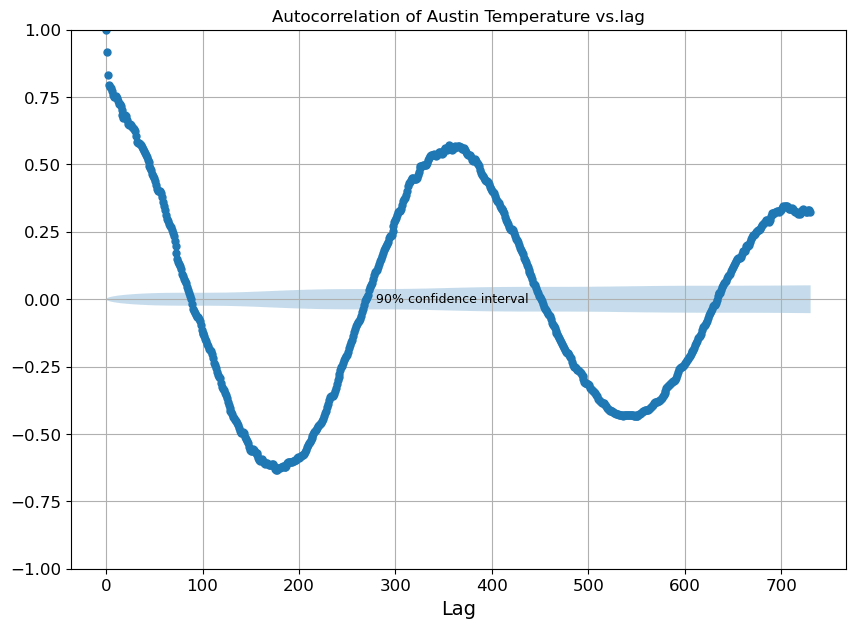

In [5]:
max_lag = 730
fig, ax = plt.subplots(figsize = (10, 7))
acf_plot = plot_acf(x = df.TempAvgF,
ax = ax,
lags = max_lag,
use_vlines = False,
alpha = 0.9,
title = 'Autocorrelation of Austin Temperature vs.lag')
ax.grid(True)
ax.text(280, -0.01, '90% confidence interval', fontsize = 9)
ax.set_xlabel('Lag', fontsize = 14)
ax.tick_params(axis = 'both', labelsize = 12)

In [6]:
corr0 = np.correlate(df.TempAvgF[0: ] -
df.TempAvgF.mean(),
df.TempAvgF[0: ] -
df.TempAvgF.mean(),
mode = 'valid')
corrs = [np.correlate(df.TempAvgF[:(df.TempAvgF.shape[0] - i)] -
df.TempAvgF.mean(),
df.TempAvgF[i: ] -
df.TempAvgF.mean(),
mode = 'valid')
for i in range(max_lag)] / corr0

In [14]:
# utility function to plot out a range of
# plots depicting self-correlation
def plot_lag_grid(series, corrs, 
                  axis_min, axis_max, 
                  num_plots, total_lag,
                  n_rows, n_cols):
    lag_step = int(total_lag / num_plots)
    fig = plt.figure(figsize = (18, 16))
    for i, var_name in enumerate(range(num_plots)):
        corr = corrs[lag_step * i]
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        ax.scatter(series, series.shift(lag_step * i))
        ax.set_xlim(axis_min, axis_max)
        ax.set_ylim(axis_min, axis_max)
        ax.set_title('lag = ' + str(lag_step * i))
        ax.text(axis_min + 0.05 * (axis_max - axis_min),
                axis_max - 0.05 * (axis_max - axis_min),
                'correlation = ' + str(round(corr[0], 3)))
    fig.tight_layout()
    plt.show()

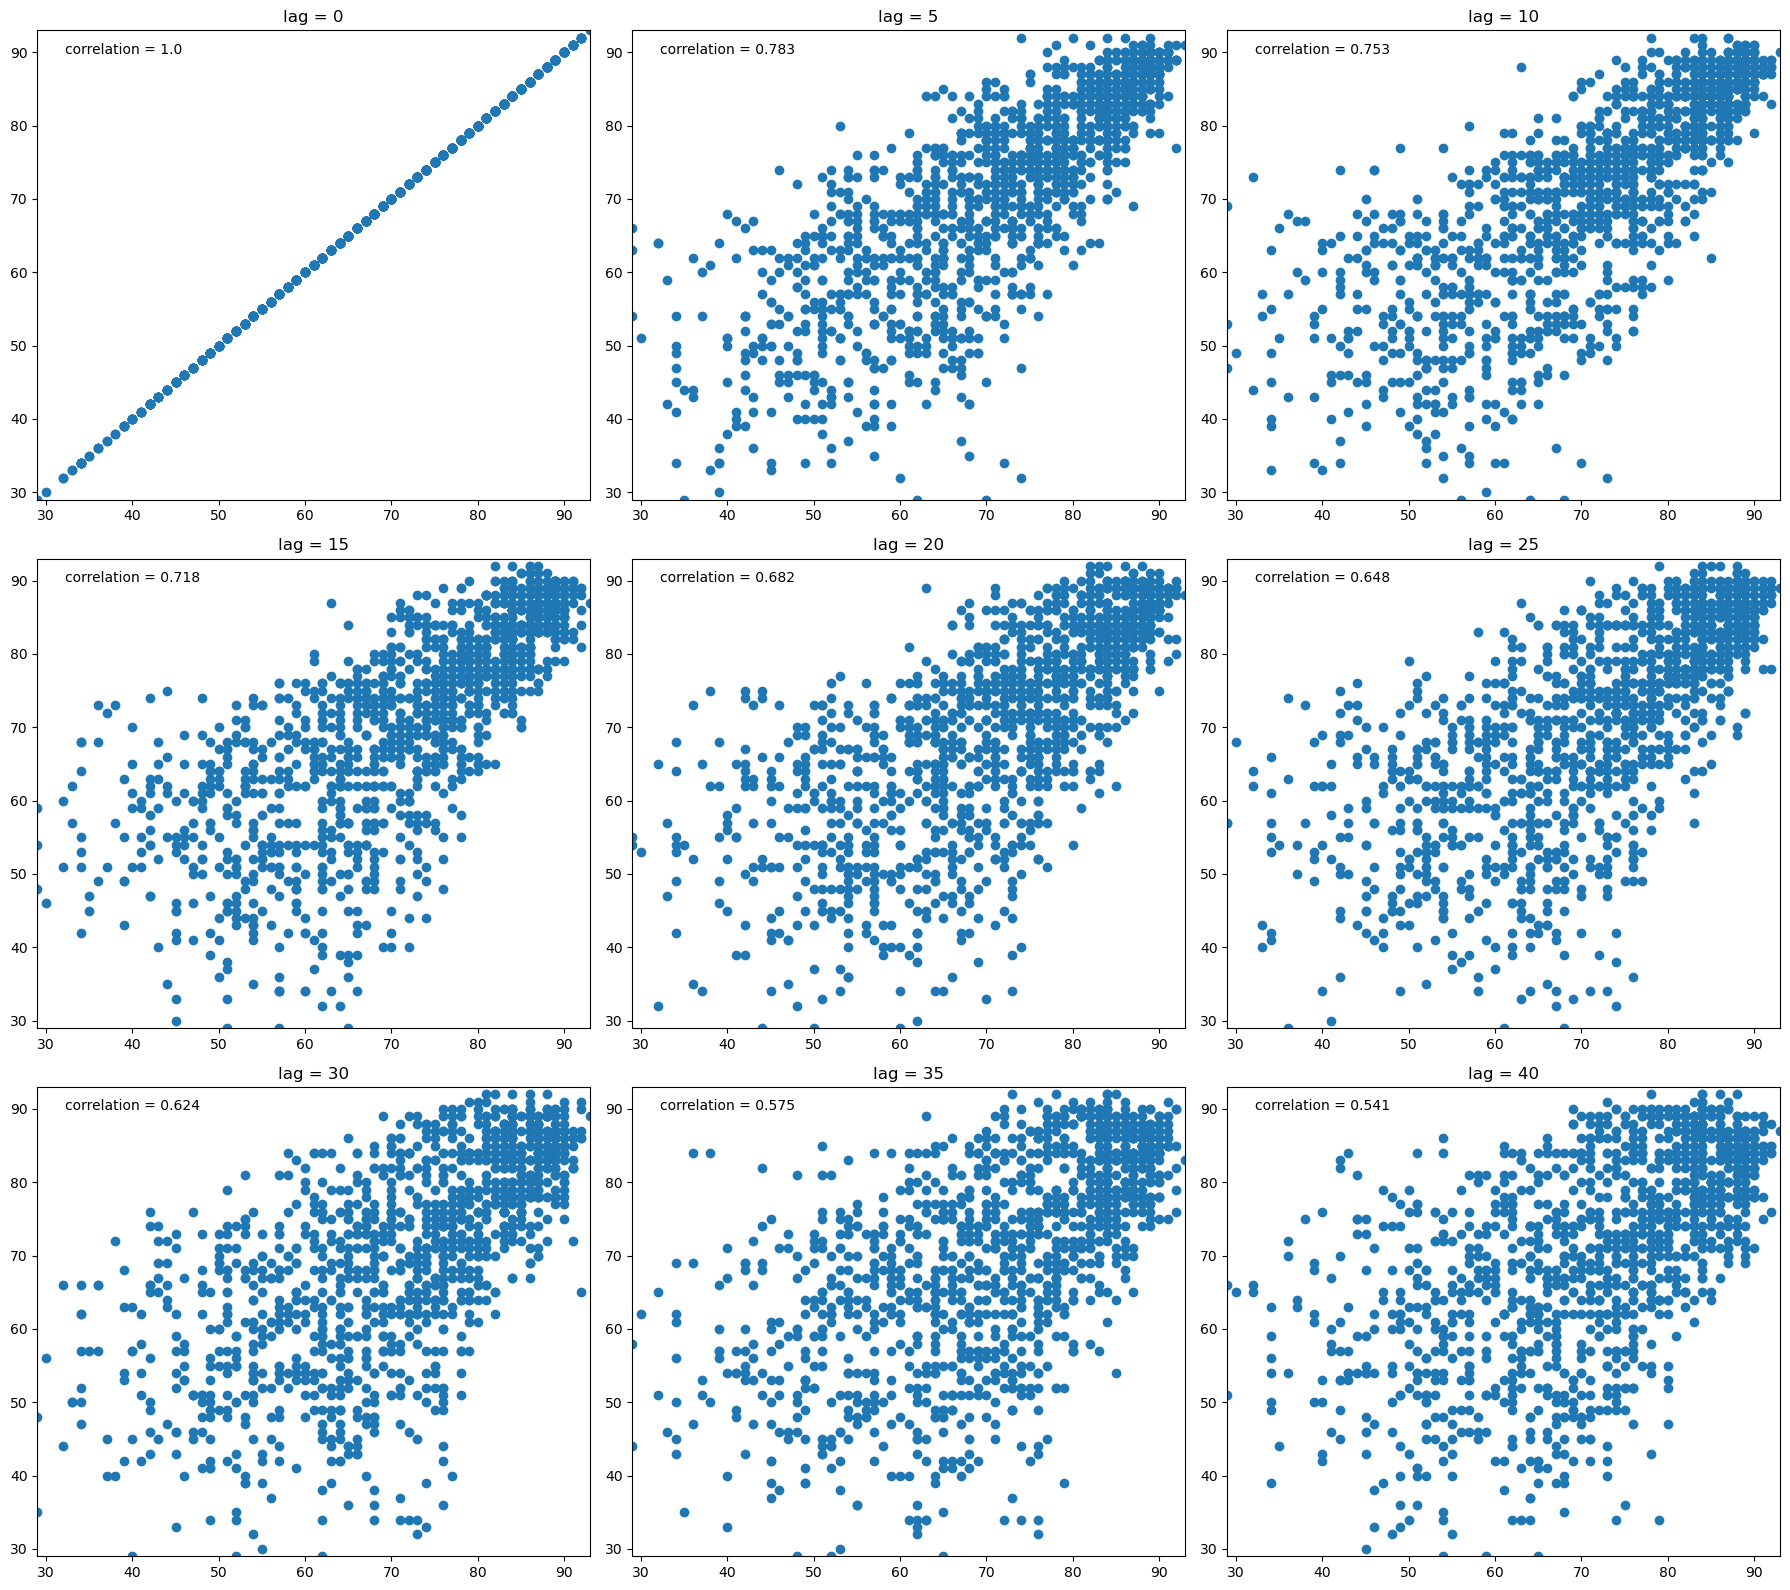

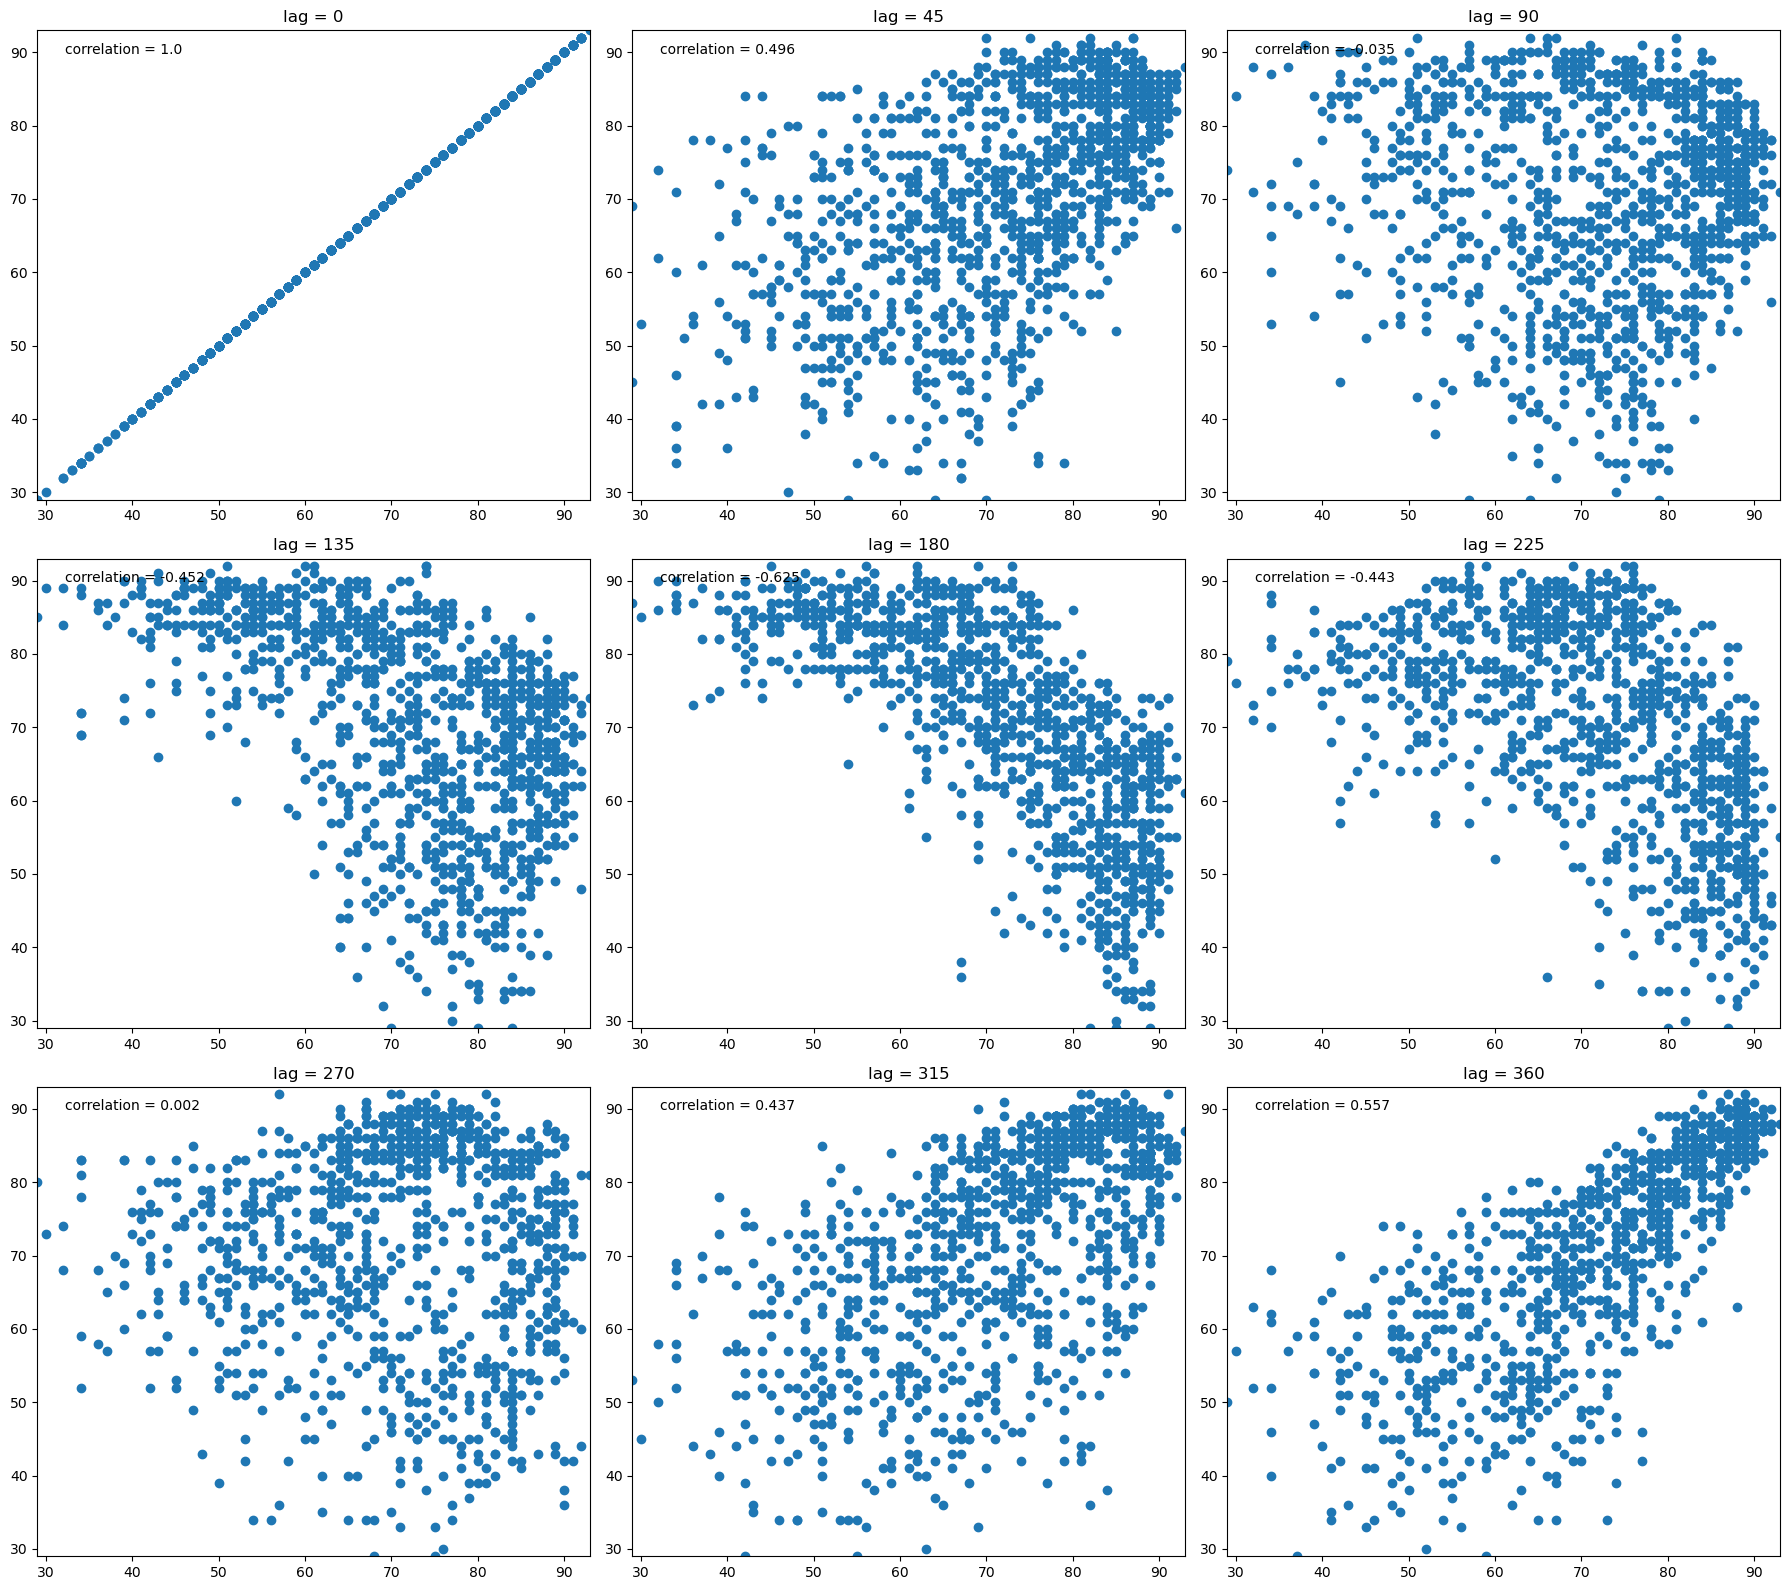

In [15]:
plot_lag_grid(df.TempAvgF, corrs,
              df.TempAvgF.min(), df.TempAvgF.max(),
              9, 45,
              3, 3)
plot_lag_grid(df.TempAvgF, corrs,
              df.TempAvgF.min(), df.TempAvgF.max(),
              9, 405,
              3, 3)

In [27]:
#
# statsmodels AR function builds an autoregression model
# using all the defaults, it will determine the max lag
# and provide all the model coefficients
#
model = AR(df.TempAvgF)
model_fit = model.fit()
#
# model fit now contains all the model information
# 
max_lag = model_fit.k_ar
#
# note that by using defaults, the maximum lag is 
# computed as round(12*(nobs/100.)**(1/4.))
# see https://www.statsmodels.org/devel/generated/statsmodels.tsa.ar_model.AR.fit.html#statsmodels.tsa.ar_model.AR.fit
#
print('Max Lag: ' + str(max_lag))
print('Coefficients: \n' + str(model_fit.params))
#
# how far into the future we want to predict
#
max_forecast = 365
#
# generate predictions from the model
#
pred_temp = pd.DataFrame({'pred_temp': 
                           model_fit.predict(start = max_lag,
                                             end = df.shape[0] + 
                                             max_forecast - 1)})
#
# attach the dates for visualization
#
pred_temp['Date'] = df.loc[pred_temp.index, 'Date'].reindex()
pred_temp.loc[(max(df.index) + 1):, 'Date'] = \
    pd.to_datetime([max(df.Date) + 
                    pd.Timedelta(days = i)
                    for i in range(1, max_forecast + 1)])

NotImplementedError: AR has been removed from statsmodels and replaced with statsmodels.tsa.ar_model.AutoReg.